In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width: 95% !important; }</style>"))

In [2]:
from pysb import *
from pysb.export import export
from pysb.bng import generate_network, generate_equations
from pysb.pathfinder import set_path
from pysb.simulator import ScipyOdeSimulator, BngSimulator, KappaSimulator
from pylab import linspace, plot, xlabel, ylabel, show

import seaborn
import matplotlib.pyplot as plt

palette = seaborn.color_palette('colorblind')

set_path('bng', '/opt/git-repositories/bionetgen.RuleWorld/bng2/')
set_path('kasim', '/opt/git-repositories/KaSim4.Kappa-Dev/')

/usr/lib/python3/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
Model()

<Model '_interactive_' (monomers: 0, rules: 0, parameters: 0, expressions: 0, compartments: 0) at 0x7f4b985bbe10>

In [4]:
Monomer('met', ['name', 'loc', 'prot'],
        { 'name' : [ 'ADP', 'ATP', 'L_RIBULOSE', 'L_RIBULOSE_5_P', 'PROTON', 'Pi', 'WATER', 
                    'XYLULOSE_5_PHOSPHATE', 'alpha_L_arabinofuranose', 'alpha_L_arabinopyranose', 
                    'beta_L_arabinofuranose', 'beta_L_arabinopyranose', 'CAMP', 'ALLOLACTOSE' ], 
          'loc' : ['cyt', 'per', 'ex']})

Monomer('dna', ['name', 'type', 'prot', 'free', 'rna', 'up', 'dw'], 
        { 'name' : ['araE', 'araF', 'araG', 'araH', 'araA', 'araB', 'araD', 'araC', 
'BS_130_146',
 'BS_267_283',
 'BS_109_125',
 'BS_56_72',
 'BS_57_73',
 'BS_137_153',
 'BS_83_104',
 'BS_62_78',
 'BS_158_174',
 'BS_36_52',
 'BS_83_99',
 'BS_35_51'], 
          'type' : ['pro1', 'pro2', 'pro3', 'pro4', 'rbs', 'cds', 'ter1', 'ter2', 'BS'],
          'free' : ['True', 'False']})

Monomer('rna', ['name', 'type', 'dna', 'prot'], 
        { 'name' : ['araE', 'araF', 'araG', 'araH', 'araA', 'araB', 'araD', 'araC', 'BS_56_72'], 
          'type' : ['pro1', 'pro2', 'pro3', 'pro4', 'rbs', 'cds', 'ter1', 'ter2', 'BS']})

Monomer('prot', ['name', 'loc', 'dna', 'met', 'rna', 'up', 'dw'],
        { 'name' : ['araE', 'araF', 'araG', 'araH', 'araA', 'araB', 'araD', 'araC', 'crp', 'lacI'], 
         'loc' : ['cyt', 'mem', 'per', 'ex'] })

Monomer('cplx', ['name', 'loc', 'dna', 'prot', 'rna'], 
        { 'name' : ['RNAP', 'Ribosome'], 
          'loc' : ['cyt', 'mem', 'per', 'ex'] })

Monomer('cplx', ['name', 'loc', 'dna', 'prot', 'rna'], {'name': ['RNAP', 'Ribosome'], 'loc': ['cyt', 'mem', 'per', 'ex']})

In [5]:
Observable('obs_ADP_cyt', met(name = 'ADP', loc = 'cyt', prot = None))
Observable('obs_ADP_per', met(name = 'ADP', loc = 'per', prot = None))
Observable('obs_ADP_ex', met(name = 'ADP', loc = 'ex', prot = None))
Observable('obs_ATP_cyt', met(name = 'ATP', loc = 'cyt', prot = None))
Observable('obs_ATP_per', met(name = 'ATP', loc = 'per', prot = None))
Observable('obs_ATP_ex', met(name = 'ATP', loc = 'ex', prot = None))
Observable('obs_L_RIBULOSE_cyt', met(name = 'L_RIBULOSE', loc = 'cyt', prot = None))
Observable('obs_L_RIBULOSE_per', met(name = 'L_RIBULOSE', loc = 'per', prot = None))
Observable('obs_L_RIBULOSE_ex', met(name = 'L_RIBULOSE', loc = 'ex', prot = None))
Observable('obs_L_RIBULOSE_5_P_cyt', met(name = 'L_RIBULOSE_5_P', loc = 'cyt', prot = None))
Observable('obs_L_RIBULOSE_5_P_per', met(name = 'L_RIBULOSE_5_P', loc = 'per', prot = None))
Observable('obs_L_RIBULOSE_5_P_ex', met(name = 'L_RIBULOSE_5_P', loc = 'ex', prot = None))
Observable('obs_PROTON_cyt', met(name = 'PROTON', loc = 'cyt', prot = None))
Observable('obs_PROTON_per', met(name = 'PROTON', loc = 'per', prot = None))
Observable('obs_PROTON_ex', met(name = 'PROTON', loc = 'ex', prot = None))
Observable('obs_Pi_cyt', met(name = 'Pi', loc = 'cyt', prot = None))
Observable('obs_Pi_per', met(name = 'Pi', loc = 'per', prot = None))
Observable('obs_Pi_ex', met(name = 'Pi', loc = 'ex', prot = None))
Observable('obs_WATER_cyt', met(name = 'WATER', loc = 'cyt', prot = None))
Observable('obs_WATER_per', met(name = 'WATER', loc = 'per', prot = None))
Observable('obs_WATER_ex', met(name = 'WATER', loc = 'ex', prot = None))
Observable('obs_XYLULOSE_5_PHOSPHATE_cyt', met(name = 'XYLULOSE_5_PHOSPHATE', loc = 'cyt', prot = None))
Observable('obs_XYLULOSE_5_PHOSPHATE_per', met(name = 'XYLULOSE_5_PHOSPHATE', loc = 'per', prot = None))
Observable('obs_XYLULOSE_5_PHOSPHATE_ex', met(name = 'XYLULOSE_5_PHOSPHATE', loc = 'ex', prot = None))
Observable('obs_alpha_L_arabinofuranose_cyt', met(name = 'alpha_L_arabinofuranose', loc = 'cyt', prot = None))
Observable('obs_alpha_L_arabinofuranose_per', met(name = 'alpha_L_arabinofuranose', loc = 'per', prot = None))
Observable('obs_alpha_L_arabinofuranose_ex', met(name = 'alpha_L_arabinofuranose', loc = 'ex', prot = None))
Observable('obs_alpha_L_arabinopyranose_cyt', met(name = 'alpha_L_arabinopyranose', loc = 'cyt', prot = None))
Observable('obs_alpha_L_arabinopyranose_per', met(name = 'alpha_L_arabinopyranose', loc = 'per', prot = None))
Observable('obs_alpha_L_arabinopyranose_ex', met(name = 'alpha_L_arabinopyranose', loc = 'ex', prot = None))
Observable('obs_beta_L_arabinofuranose_cyt', met(name = 'beta_L_arabinofuranose', loc = 'cyt', prot = None))
Observable('obs_beta_L_arabinofuranose_per', met(name = 'beta_L_arabinofuranose', loc = 'per', prot = None))
Observable('obs_beta_L_arabinofuranose_ex', met(name = 'beta_L_arabinofuranose', loc = 'ex', prot = None))
Observable('obs_beta_L_arabinopyranose_cyt', met(name = 'beta_L_arabinopyranose', loc = 'cyt', prot = None))
Observable('obs_beta_L_arabinopyranose_per', met(name = 'beta_L_arabinopyranose', loc = 'per', prot = None))
Observable('obs_beta_L_arabinopyranose_ex', met(name = 'beta_L_arabinopyranose', loc = 'ex', prot = None))

# Initial(met(name = 'ADP', loc = 'cyt', prot = None), Parameter('t0_ADP_cyt', 0))
# Initial(met(name = 'ADP', loc = 'per', prot = None), Parameter('t0_ADP_per', 0))
# Initial(met(name = 'ADP', loc = 'ex', prot = None), Parameter('t0_ADP_ex', 0))
Initial(met(name = 'ATP', loc = 'cyt', prot = None), Parameter('t0_ATP_cyt', 100))
# Initial(met(name = 'ATP', loc = 'per', prot = None), Parameter('t0_ATP_per', 0))
# Initial(met(name = 'ATP', loc = 'ex', prot = None), Parameter('t0_ATP_ex', 0))
# Initial(met(name = 'L_RIBULOSE', loc = 'cyt', prot = None), Parameter('t0_L_RIBULOSE_cyt', 0))
# Initial(met(name = 'L_RIBULOSE', loc = 'per', prot = None), Parameter('t0_L_RIBULOSE_per', 0))
# Initial(met(name = 'L_RIBULOSE', loc = 'ex', prot = None), Parameter('t0_L_RIBULOSE_ex', 0))
# Initial(met(name = 'L_RIBULOSE_5_P', loc = 'cyt', prot = None), Parameter('t0_L_RIBULOSE_5_P_cyt', 0))
# Initial(met(name = 'L_RIBULOSE_5_P', loc = 'per', prot = None), Parameter('t0_L_RIBULOSE_5_P_per', 0))
# Initial(met(name = 'L_RIBULOSE_5_P', loc = 'ex', prot = None), Parameter('t0_L_RIBULOSE_5_P_ex', 0))
# Initial(met(name = 'PROTON', loc = 'cyt', prot = None), Parameter('t0_PROTON_cyt', 0))
Initial(met(name = 'PROTON', loc = 'per', prot = None), Parameter('t0_PROTON_per', 100))
# Initial(met(name = 'PROTON', loc = 'ex', prot = None), Parameter('t0_PROTON_ex', 0))
# Initial(met(name = 'Pi', loc = 'cyt', prot = None), Parameter('t0_Pi_cyt', 0))
# Initial(met(name = 'Pi', loc = 'per', prot = None), Parameter('t0_Pi_per', 0))
# Initial(met(name = 'Pi', loc = 'ex', prot = None), Parameter('t0_Pi_ex', 0))
Initial(met(name = 'WATER', loc = 'cyt', prot = None), Parameter('t0_WATER_cyt', 100))
# Initial(met(name = 'WATER', loc = 'per', prot = None), Parameter('t0_WATER_per', 0))
# Initial(met(name = 'WATER', loc = 'ex', prot = None), Parameter('t0_WATER_ex', 0))
# Initial(met(name = 'XYLULOSE_5_PHOSPHATE', loc = 'cyt', prot = None), Parameter('t0_XYLULOSE_5_PHOSPHATE_cyt', 0))
# Initial(met(name = 'XYLULOSE_5_PHOSPHATE', loc = 'per', prot = None), Parameter('t0_XYLULOSE_5_PHOSPHATE_per', 0))
# Initial(met(name = 'XYLULOSE_5_PHOSPHATE', loc = 'ex', prot = None), Parameter('t0_XYLULOSE_5_PHOSPHATE_ex', 0))
# Initial(met(name = 'alpha_L_arabinofuranose', loc = 'cyt', prot = None), Parameter('t0_alpha_L_arabinofuranose_cyt', 0))
# Initial(met(name = 'alpha_L_arabinofuranose', loc = 'per', prot = None), Parameter('t0_alpha_L_arabinofuranose_per', 0))
# Initial(met(name = 'alpha_L_arabinofuranose', loc = 'ex', prot = None), Parameter('t0_alpha_L_arabinofuranose_ex', 0))
# Initial(met(name = 'alpha_L_arabinopyranose', loc = 'cyt', prot = None), Parameter('t0_alpha_L_arabinopyranose_cyt', 0))
Initial(met(name = 'alpha_L_arabinopyranose', loc = 'per', prot = None), Parameter('t0_alpha_L_arabinopyranose_per', 100))
# Initial(met(name = 'alpha_L_arabinopyranose', loc = 'ex', prot = None), Parameter('t0_alpha_L_arabinopyranose_ex', 0))
# Initial(met(name = 'beta_L_arabinofuranose', loc = 'cyt', prot = None), Parameter('t0_beta_L_arabinofuranose_cyt', 0))
# Initial(met(name = 'beta_L_arabinofuranose', loc = 'per', prot = None), Parameter('t0_beta_L_arabinofuranose_per', 0))
# Initial(met(name = 'beta_L_arabinofuranose', loc = 'ex', prot = None), Parameter('t0_beta_L_arabinofuranose_ex', 0))
# Initial(met(name = 'beta_L_arabinopyranose', loc = 'cyt', prot = None), Parameter('t0_beta_L_arabinopyranose_cyt', 0))
# Initial(met(name = 'beta_L_arabinopyranose', loc = 'per', prot = None), Parameter('t0_beta_L_arabinopyranose_per', 0))
# Initial(met(name = 'beta_L_arabinopyranose', loc = 'ex', prot = None), Parameter('t0_beta_L_arabinopyranose_ex', 0))

Initial(met(name='alpha_L_arabinopyranose', loc='per', prot=None), t0_alpha_L_arabinopyranose_per)

In [6]:
# ABC_2_CPLX = prot(name = 'AraF', loc = 'cyt', dna = None, met = None, rna = None, up = None, dw = 1) % \
#             prot(name = 'AraG', loc = 'cyt', dna = None, met = None, rna = None, up = 1, dw = 2) % \
#             prot(name = 'AraG', loc = 'cyt', dna = None, met = None, rna = None, up = 2, dw = 3) % \
#             prot(name = 'AraH', loc = 'cyt', dna = None, met = None, rna = None, up = 3, dw = 4) % \
#             prot(name = 'AraH', loc = 'cyt', dna = None, met = None, rna = None, up = 4, dw = None)
# Initial(ABC_2_CPLX, Parameter('t0_ABC_2_CPLX', 0))

Initial(prot(name = 'araA', loc = 'cyt', dna = None, met = None, rna = None, up = None, dw = None), Parameter('t0_araA_cyt', 0))
Initial(prot(name = 'araB', loc = 'cyt', dna = None, met = None, rna = None, up = None, dw = None), Parameter('t0_arab_cyt', 0))
Initial(prot(name = 'araC', loc = 'cyt', dna = None, met = None, rna = None, up = None, dw = None), Parameter('t0_araC_cyt', 0))
Initial(prot(name = 'araD', loc = 'cyt', dna = None, met = None, rna = None, up = None, dw = None), Parameter('t0_araD_cyt', 0))
Initial(prot(name = 'araE', loc = 'cyt', dna = None, met = None, rna = None, up = None, dw = None), Parameter('t0_araE_cyt', 0))
Initial(prot(name = 'araF', loc = 'cyt', dna = None, met = None, rna = None, up = None, dw = None), Parameter('t0_araF_cyt', 0))
Initial(prot(name = 'araG', loc = 'cyt', dna = None, met = None, rna = None, up = None, dw = None), Parameter('t0_araG_cyt', 0))
Initial(prot(name = 'araH', loc = 'cyt', dna = None, met = None, rna = None, up = None, dw = None), Parameter('t0_araH_cyt', 0))

Observable('obs_araA_prot', prot(name = 'araA'))
Observable('obs_araB_prot', prot(name = 'araB'))
Observable('obs_araC_prot', prot(name = 'araC'))
Observable('obs_araD_prot', prot(name = 'araD'))
Observable('obs_araE_prot', prot(name = 'araE'))
Observable('obs_araF_prot', prot(name = 'araF'))
Observable('obs_araG_prot', prot(name = 'araG'))
Observable('obs_araH_prot', prot(name = 'araH'))


Observable('obs_araH_prot', prot(name='araH'))

In [7]:
## docking and falloff of RNAP from DNA
Rule('docking_araB_pro1_basal',
    cplx(name = 'RNAP', dna = None) + dna(name = 'araB', type = 'pro1', prot = None, free = 'True') |
    cplx(name = 'RNAP', dna = 1) % dna(name = 'araB', type = 'pro1', prot = 1, free = 'False'),
    Parameter('fwd_docking_araB_pro1_basal', 1e-3), Parameter('rvs_docking_araB_pro1_basal', 1))

Rule('docking_araB_pro1',
    cplx(name = 'RNAP', dna = None) + dna(name = 'araB', type = 'pro1', prot = None, free = 'True') +
    prot(name = 'araC', dna = 3, met = 2, up = None, dw = 1) %
    met(name = 'alpha_L_arabinopyranose', prot = 2) %
    dna(name = 'BS_56_72', prot = 3, free = 'False', up = WILD, dw = WILD) %
    prot(name = 'araC', dna = 5, met = 4, up = 1, dw = None) %
    met(name = 'alpha_L_arabinopyranose', prot = 4) %
    dna(name = 'BS_35_51', prot = 5, free = 'False', up = WILD, dw = WILD) |
    cplx(name = 'RNAP', dna = 6) % dna(name = 'araB', type = 'pro1', prot = 6, free = 'False') +
    prot(name = 'araC', dna = 3, met = 2, up = None, dw = 1) %
    met(name = 'alpha_L_arabinopyranose', prot = 2) %
    dna(name = 'BS_56_72', prot = 3, free = 'False', up = WILD, dw = WILD) %
    prot(name = 'araC', dna = 5, met = 4, up = 1, dw = None) %
    met(name = 'alpha_L_arabinopyranose', prot = 4) %
    dna(name = 'BS_35_51', prot = 5, free = 'False', up = WILD, dw = WILD),
    Parameter('fwd_docking_araB_pro1', 1), Parameter('rvs_docking_araB_pro1', 1))

Rule('falloff_araD_ter1',
    cplx(name = 'RNAP', dna = 1) % dna(name = 'araD', type = 'ter1', prot = 1, free = 'False') >>
    cplx(name = 'RNAP', dna = None) + dna(name = 'araD', type = 'ter1', prot = None, free = 'True'),
    Parameter('fwd_falloff_araD_ter1', 1))

Rule('docking_araC_pro1_basal',
    cplx(name = 'RNAP', dna = None) + dna(name = 'araC', type = 'pro1', prot = None, free = 'True') |
    cplx(name = 'RNAP', dna = 1) % dna(name = 'araC', type = 'pro1', prot = 1, free = 'False'),
    Parameter('fwd_docking_araC_pro1_basal', 1e-2), Parameter('rvs_docking_araC_pro1_basal', 1))

Rule('falloff_araC_ter1',
    cplx(name = 'RNAP', dna = 1) % dna(name = 'araC', type = 'ter1', prot = 1, free = 'False') >>
    cplx(name = 'RNAP', dna = None) + dna(name = 'araC', type = 'ter1', prot = None, free = 'True'),
    Parameter('fwd_falloff_araC_ter1', 1))

Rule('docking_araE_pro1_basal',
    cplx(name = 'RNAP', dna = None) + dna(name = 'araE', type = 'pro1', prot = None, free = 'True') |
    cplx(name = 'RNAP', dna = 1) % dna(name = 'araE', type = 'pro1', prot = 1, free = 'False'),
    Parameter('fwd_docking_araE_pro1_basal', 1e-3), Parameter('rvs_docking_araE_pro1_basal', 1))

Rule('docking_araE_pro1',
    cplx(name = 'RNAP', dna = None) + dna(name = 'araE', type = 'pro1', prot = None, free = 'True') +
    prot(name = 'araC', dna = 3, met = 2, up = None, dw = 1) %
    met(name = 'alpha_L_arabinopyranose', prot = 2) %
    dna(name = 'BS_57_73', prot = 3, free = 'False', up = WILD, dw = WILD) %
    prot(name = 'araC', dna = 5, met = 4, up = 1, dw = None) %
    met(name = 'alpha_L_arabinopyranose', prot = 4) %
    dna(name = 'BS_36_52', prot = 5, free = 'False', up = WILD, dw = WILD) |
    cplx(name = 'RNAP', dna = 6) % dna(name = 'araE', type = 'pro1', prot = 6, free = 'False') +
    prot(name = 'araC', dna = 3, met = 2, up = None, dw = 1) %
    met(name = 'alpha_L_arabinopyranose', prot = 2) %
    dna(name = 'BS_57_73', prot = 3, free = 'False', up = WILD, dw = WILD) %
    prot(name = 'araC', dna = 5, met = 4, up = 1, dw = None) %
    met(name = 'alpha_L_arabinopyranose', prot = 4) %
    dna(name = 'BS_36_52', prot = 5, free = 'False', up = WILD, dw = WILD),
    Parameter('fwd_docking_araE_pro1', 1), Parameter('rvs_docking_araE_pro1', 1))

Rule('falloff_araE_ter1',
    cplx(name = 'RNAP', dna = 1) % dna(name = 'araE', type = 'ter1', prot = 1, free = 'False') >>
    cplx(name = 'RNAP', dna = None) + dna(name = 'araE', type = 'ter1', prot = None, free = 'True'),
    Parameter('fwd_falloff_araE_ter1', 1))

Rule('docking_araF_pro1_basal',
    cplx(name = 'RNAP', dna = None) + dna(name = 'araF', type = 'pro1', prot = None, free = 'True') |
    cplx(name = 'RNAP', dna = 1) % dna(name = 'araF', type = 'pro1', prot = 1, free = 'False'),
    Parameter('fwd_docking_araF_pro1_basal', 1e-3), Parameter('rvs_docking_araF_pro1_basal', 1))

Rule('docking_araF_pro1',
    cplx(name = 'RNAP', dna = None) + dna(name = 'araF', type = 'pro1', prot = None, free = 'True') +
    prot(name = 'araC', dna = 3, met = 2, up = None, dw = 1) %
    met(name = 'alpha_L_arabinopyranose', prot = 2) %
    dna(name = 'BS_83_99', prot = 3, free = 'False', up = WILD, dw = WILD) %
    prot(name = 'araC', dna = 5, met = 4, up = 1, dw = None) %
    met(name = 'alpha_L_arabinopyranose', prot = 4) %
    dna(name = 'BS_62_78', prot = 5, free = 'False', up = WILD, dw = WILD) |
    cplx(name = 'RNAP', dna = 6) % dna(name = 'araF', type = 'pro1', prot = 6, free = 'False') +
    prot(name = 'araC', dna = 3, met = 2, up = None, dw = 1) %
    met(name = 'alpha_L_arabinopyranose', prot = 2) %
    dna(name = 'BS_83_99', prot = 3, free = 'False', up = WILD, dw = WILD) %
    prot(name = 'araC', dna = 5, met = 4, up = 1, dw = None) %
    met(name = 'alpha_L_arabinopyranose', prot = 4) %
    dna(name = 'BS_62_78', prot = 5, free = 'False', up = WILD, dw = WILD),
    Parameter('fwd_docking_araF_pro1', 1), Parameter('rvs_docking_araF_pro1', 1))

Rule('falloff_araH_ter1',
    cplx(name = 'RNAP', dna = 1) % dna(name = 'araH', type = 'ter1', prot = 1, free = 'False') >>
    cplx(name = 'RNAP', dna = None) + dna(name = 'araH', type = 'ter1', prot = None, free = 'True'),
    Parameter('fwd_falloff_araH_ter1', 1))

## RNAP sliding through DNA
Rule('sliding_araB_pro1',
    cplx(name = 'RNAP', dna = 1) % dna(name = 'araB', type = 'pro1', prot = 1, free = 'False') + None + dna(name = 'araB', type = 'rbs', prot = None, free = 'True') >>
    cplx(name = 'RNAP', dna = 1) % dna(name = 'araB', type = 'rbs', prot = 1, free = 'False') + rna(name = 'araB', type = 'rbs', dna = None, prot = None) + dna(name = 'araB', type = 'pro1', prot = None, free = 'True'),
    Parameter('fwd_sliding_araB_pro1', 1))

Rule('sliding_araB_rbs',
    cplx(name = 'RNAP', dna = 1) % dna(name = 'araB', type = 'rbs', prot = 1, free = 'False') + None + dna(name = 'araB', type = 'cds', prot = None, free = 'True') >>
    cplx(name = 'RNAP', dna = 1) % dna(name = 'araB', type = 'cds', prot = 1, free = 'False') + rna(name = 'araB', type = 'cds', dna = None, prot = None) + dna(name = 'araB', type = 'rbs', prot = None, free = 'True'),
    Parameter('fwd_sliding_araB_rbs', 1))

Rule('sliding_araB_cds',
    cplx(name = 'RNAP', dna = 1) % dna(name = 'araB', type = 'cds', prot = 1, free = 'False') + None + dna(name = 'araA', type = 'rbs', prot = None, free = 'True') >>
    cplx(name = 'RNAP', dna = 1) % dna(name = 'araA', type = 'rbs', prot = 1, free = 'False') + rna(name = 'araA', type = 'rbs', dna = None, prot = None) + dna(name = 'araB', type = 'cds', prot = None, free = 'True'),
    Parameter('fwd_sliding_araB_cds', 1))

Rule('sliding_araA_rbs',
    cplx(name = 'RNAP', dna = 1) % dna(name = 'araA', type = 'rbs', prot = 1, free = 'False') + None + dna(name = 'araA', type = 'cds', prot = None, free = 'True') >>
    cplx(name = 'RNAP', dna = 1) % dna(name = 'araA', type = 'cds', prot = 1, free = 'False') + rna(name = 'araA', type = 'cds', dna = None, prot = None) + dna(name = 'araA', type = 'rbs', prot = None, free = 'True'),
    Parameter('fwd_sliding_araA_rbs', 1))

Rule('sliding_araA_cds',
    cplx(name = 'RNAP', dna = 1) % dna(name = 'araA', type = 'cds', prot = 1, free = 'False') + None + dna(name = 'araD', type = 'rbs', prot = None, free = 'True') >>
    cplx(name = 'RNAP', dna = 1) % dna(name = 'araD', type = 'rbs', prot = 1, free = 'False') + rna(name = 'araD', type = 'rbs', dna = None, prot = None) + dna(name = 'araA', type = 'cds', prot = None, free = 'True'),
    Parameter('fwd_sliding_araA_cds', 1))

Rule('sliding_araD_rbs',
    cplx(name = 'RNAP', dna = 1) % dna(name = 'araD', type = 'rbs', prot = 1, free = 'False') + None + dna(name = 'araD', type = 'cds', prot = None, free = 'True') >>
    cplx(name = 'RNAP', dna = 1) % dna(name = 'araD', type = 'cds', prot = 1, free = 'False') + rna(name = 'araD', type = 'cds', dna = None, prot = None) + dna(name = 'araD', type = 'rbs', prot = None, free = 'True'),
    Parameter('fwd_sliding_araD_rbs', 1))

Rule('sliding_araD_cds',
    cplx(name = 'RNAP', dna = 1) % dna(name = 'araD', type = 'cds', prot = 1, free = 'False') + None + dna(name = 'araD', type = 'ter1', prot = None, free = 'True') >>
    cplx(name = 'RNAP', dna = 1) % dna(name = 'araD', type = 'ter1', prot = 1, free = 'False') + rna(name = 'araD', type = 'ter1', dna = None, prot = None) + dna(name = 'araD', type = 'cds', prot = None, free = 'True'),
    Parameter('fwd_sliding_araD_cds', 1))

Rule('sliding_araC_pro1',
    cplx(name = 'RNAP', dna = 1) % dna(name = 'araC', type = 'pro1', prot = 1, free = 'False') + None + dna(name = 'BS_56_72', type = 'BS', prot = None, free = 'True') >>
    cplx(name = 'RNAP', dna = 1) % dna(name = 'BS_56_72', type = 'BS', prot = 1, free = 'False') + rna(name = 'BS_56_72', type = 'BS', dna = None, prot = None) + dna(name = 'araC', type = 'pro1', prot = None, free = 'True'),
    Parameter('fwd_sliding_araC_pro1', 1))

Rule('sliding_araC_BS_56_72',
    cplx(name = 'RNAP', dna = 1) % dna(name = 'BS_56_72', type = 'BS', prot = 1, free = 'False') + None + dna(name = 'araC', type = 'rbs', prot = None, free = 'True') >>
    cplx(name = 'RNAP', dna = 1) % dna(name = 'araC', type = 'rbs', prot = 1, free = 'False') + rna(name = 'araC', type = 'rbs', dna = None, prot = None) + dna(name = 'BS_56_72', type = 'BS', prot = None, free = 'True'),
    Parameter('fwd_sliding_araC_BS_56_72', 1))

Rule('sliding_araC_rbs',
    cplx(name = 'RNAP', dna = 1) % dna(name = 'araC', type = 'rbs', prot = 1, free = 'False') + None + dna(name = 'araC', type = 'cds', prot = None, free = 'True') >>
    cplx(name = 'RNAP', dna = 1) % dna(name = 'araC', type = 'cds', prot = 1, free = 'False') + rna(name = 'araC', type = 'cds', dna = None, prot = None) + dna(name = 'araC', type = 'rbs', prot = None, free = 'True'),
    Parameter('fwd_sliding_araC_rbs', 1))

Rule('sliding_araC_cds',
    cplx(name = 'RNAP', dna = 1) % dna(name = 'araC', type = 'cds', prot = 1, free = 'False') + None + dna(name = 'araC', type = 'ter1', prot = None, free = 'True') >>
    cplx(name = 'RNAP', dna = 1) % dna(name = 'araC', type = 'ter1', prot = 1, free = 'False') + rna(name = 'araC', type = 'ter1', dna = None, prot = None) + dna(name = 'araC', type = 'cds', prot = None, free = 'True'),
    Parameter('fwd_sliding_araC_cds', 1))

Rule('sliding_araE_pro1',
    cplx(name = 'RNAP', dna = 1) % dna(name = 'araE', type = 'pro1', prot = 1, free = 'False') + None + dna(name = 'araE', type = 'rbs', prot = None, free = 'True') >>
    cplx(name = 'RNAP', dna = 1) % dna(name = 'araE', type = 'rbs', prot = 1, free = 'False') + rna(name = 'araE', type = 'rbs', dna = None, prot = None) + dna(name = 'araE', type = 'pro1', prot = None, free = 'True'),
    Parameter('fwd_sliding_araE_pro1', 1))

Rule('sliding_araE_rbs',
    cplx(name = 'RNAP', dna = 1) % dna(name = 'araE', type = 'rbs', prot = 1, free = 'False') + None + dna(name = 'araE', type = 'cds', prot = None, free = 'True') >>
    cplx(name = 'RNAP', dna = 1) % dna(name = 'araE', type = 'cds', prot = 1, free = 'False') + rna(name = 'araE', type = 'cds', dna = None, prot = None) + dna(name = 'araE', type = 'rbs', prot = None, free = 'True'),
    Parameter('fwd_sliding_araE_rbs', 1))

Rule('sliding_araE_cds',
    cplx(name = 'RNAP', dna = 1) % dna(name = 'araE', type = 'cds', prot = 1, free = 'False') + None + dna(name = 'araE', type = 'ter1', prot = None, free = 'True') >>
    cplx(name = 'RNAP', dna = 1) % dna(name = 'araE', type = 'ter1', prot = 1, free = 'False') + rna(name = 'araE', type = 'ter1', dna = None, prot = None) + dna(name = 'araE', type = 'cds', prot = None, free = 'True'),
    Parameter('fwd_sliding_araE_cds', 1))

Rule('sliding_araF_pro1',
    cplx(name = 'RNAP', dna = 1) % dna(name = 'araF', type = 'pro1', prot = 1, free = 'False') + None + dna(name = 'araF', type = 'rbs', prot = None, free = 'True') >>
    cplx(name = 'RNAP', dna = 1) % dna(name = 'araF', type = 'rbs', prot = 1, free = 'False') + rna(name = 'araF', type = 'rbs', dna = None, prot = None) + dna(name = 'araF', type = 'pro1', prot = None, free = 'True'),
    Parameter('fwd_sliding_araF_pro1', 1))

Rule('sliding_araF_rbs',
    cplx(name = 'RNAP', dna = 1) % dna(name = 'araF', type = 'rbs', prot = 1, free = 'False') + None + dna(name = 'araF', type = 'cds', prot = None, free = 'True') >>
    cplx(name = 'RNAP', dna = 1) % dna(name = 'araF', type = 'cds', prot = 1, free = 'False') + rna(name = 'araF', type = 'cds', dna = None, prot = None) + dna(name = 'araF', type = 'rbs', prot = None, free = 'True'),
    Parameter('fwd_sliding_araF_rbs', 1))

Rule('sliding_araF_cds',
    cplx(name = 'RNAP', dna = 1) % dna(name = 'araF', type = 'cds', prot = 1, free = 'False') + None + dna(name = 'araG', type = 'rbs', prot = None, free = 'True') >>
    cplx(name = 'RNAP', dna = 1) % dna(name = 'araG', type = 'rbs', prot = 1, free = 'False') + rna(name = 'araG', type = 'rbs', dna = None, prot = None) + dna(name = 'araF', type = 'cds', prot = None, free = 'True'),
    Parameter('fwd_sliding_araF_cds', 1))

Rule('sliding_araG_rbs',
    cplx(name = 'RNAP', dna = 1) % dna(name = 'araG', type = 'rbs', prot = 1, free = 'False') + None + dna(name = 'araG', type = 'cds', prot = None, free = 'True') >>
    cplx(name = 'RNAP', dna = 1) % dna(name = 'araG', type = 'cds', prot = 1, free = 'False') + rna(name = 'araG', type = 'cds', dna = None, prot = None) + dna(name = 'araG', type = 'rbs', prot = None, free = 'True'),
    Parameter('fwd_sliding_araG_rbs', 1))

Rule('sliding_araG_cds',
    cplx(name = 'RNAP', dna = 1) % dna(name = 'araG', type = 'cds', prot = 1, free = 'False') + None + dna(name = 'araH', type = 'rbs', prot = None, free = 'True') >>
    cplx(name = 'RNAP', dna = 1) % dna(name = 'araH', type = 'rbs', prot = 1, free = 'False') + rna(name = 'araH', type = 'rbs', dna = None, prot = None) + dna(name = 'araG', type = 'cds', prot = None, free = 'True'),
    Parameter('fwd_sliding_araG_cds', 1))

Rule('sliding_araH_rbs',
    cplx(name = 'RNAP', dna = 1) % dna(name = 'araH', type = 'rbs', prot = 1, free = 'False') + None + dna(name = 'araH', type = 'cds', prot = None, free = 'True') >>
    cplx(name = 'RNAP', dna = 1) % dna(name = 'araH', type = 'cds', prot = 1, free = 'False') + rna(name = 'araH', type = 'cds', dna = None, prot = None) + dna(name = 'araH', type = 'rbs', prot = None, free = 'True'),
    Parameter('fwd_sliding_araH_rbs', 1))

Rule('sliding_araH_cds',
    cplx(name = 'RNAP', dna = 1) % dna(name = 'araH', type = 'cds', prot = 1, free = 'False') + None + dna(name = 'araH', type = 'ter1', prot = None, free = 'True') >>
    cplx(name = 'RNAP', dna = 1) % dna(name = 'araH', type = 'ter1', prot = 1, free = 'False') + rna(name = 'araH', type = 'ter1', dna = None, prot = None) + dna(name = 'araH', type = 'cds', prot = None, free = 'True'),
    Parameter('fwd_sliding_araH_cds', 1))

## docking and falloff of Ribosome from RNA
Rule('dr_araB_rbs', cplx(name = 'Ribosome', rna = None) + rna(name = 'araB', type = 'rbs', prot = None) |
    cplx(name = 'Ribosome', rna = 1) % rna(name = 'araB', type = 'rbs', prot = 1),
    Parameter('fwd_dr_araB_rbs', 1), Parameter('rvs_dr_araB_rbs', 1))

Rule('dr_araA_rbs', cplx(name = 'Ribosome', rna = None) + rna(name = 'araA', type = 'rbs', prot = None) |
    cplx(name = 'Ribosome', rna = 1) % rna(name = 'araA', type = 'rbs', prot = 1),
    Parameter('fwd_dr_araA_rbs', 1), Parameter('rvs_dr_araA_rbs', 1))

Rule('dr_araD_rbs', cplx(name = 'Ribosome', rna = None) + rna(name = 'araD', type = 'rbs', prot = None) |
    cplx(name = 'Ribosome', rna = 1) % rna(name = 'araD', type = 'rbs', prot = 1),
    Parameter('fwd_dr_araD_rbs', 1), Parameter('rvs_dr_araD_rbs', 1))

Rule('fr_araD_ter1', cplx(name = 'Ribosome', rna = 1) % rna(name = 'araD', type = 'ter1', prot = 1) >>
    cplx(name = 'Ribosome', rna = None) + rna(name = 'araD', type = 'ter1', prot = None),
    Parameter('fwd_fr_araD_ter1', 1))

Rule('dr_araC_rbs', cplx(name = 'Ribosome', rna = None) + rna(name = 'araC', type = 'rbs', prot = None) |
    cplx(name = 'Ribosome', rna = 1) % rna(name = 'araC', type = 'rbs', prot = 1),
    Parameter('fwd_dr_araC_rbs', 1), Parameter('rvs_dr_araC_rbs', 1))

Rule('fr_araC_ter1', cplx(name = 'Ribosome', rna = 1) % rna(name = 'araC', type = 'ter1', prot = 1) >>
    cplx(name = 'Ribosome', rna = None) + rna(name = 'araC', type = 'ter1', prot = None),
    Parameter('fwd_fr_araC_ter1', 1))

Rule('dr_araE_rbs', cplx(name = 'Ribosome', rna = None) + rna(name = 'araE', type = 'rbs', prot = None) |
    cplx(name = 'Ribosome', rna = 1) % rna(name = 'araE', type = 'rbs', prot = 1),
    Parameter('fwd_dr_araE_rbs', 1), Parameter('rvs_dr_araE_rbs', 1))

Rule('fr_araE_ter1', cplx(name = 'Ribosome', rna = 1) % rna(name = 'araE', type = 'ter1', prot = 1) >>
    cplx(name = 'Ribosome', rna = None) + rna(name = 'araE', type = 'ter1', prot = None),
    Parameter('fwd_fr_araE_ter1', 1))

Rule('dr_araF_rbs', cplx(name = 'Ribosome', rna = None) + rna(name = 'araF', type = 'rbs', prot = None) |
    cplx(name = 'Ribosome', rna = 1) % rna(name = 'araF', type = 'rbs', prot = 1),
    Parameter('fwd_dr_araF_rbs', 1), Parameter('rvs_dr_araF_rbs', 1))

Rule('dr_araG_rbs', cplx(name = 'Ribosome', rna = None) + rna(name = 'araG', type = 'rbs', prot = None) |
    cplx(name = 'Ribosome', rna = 1) % rna(name = 'araG', type = 'rbs', prot = 1),
    Parameter('fwd_dr_araG_rbs', 1), Parameter('rvs_dr_araG_rbs', 1))

Rule('dr_araH_rbs', cplx(name = 'Ribosome', rna = None) + rna(name = 'araH', type = 'rbs', prot = None) |
    cplx(name = 'Ribosome', rna = 1) % rna(name = 'araH', type = 'rbs', prot = 1),
    Parameter('fwd_dr_araH_rbs', 1), Parameter('rvs_dr_araH_rbs', 1))

Rule('fr_araH_ter1', cplx(name = 'Ribosome', rna = 1) % rna(name = 'araH', type = 'ter1', prot = 1) >>
    cplx(name = 'Ribosome', rna = None) + rna(name = 'araH', type = 'ter1', prot = None),
    Parameter('fwd_fr_araH_ter1', 1))

## protein synthesis and sliding through mRNAs, prune as necessary
Rule('sr_araB_rbs',
    cplx(name = 'Ribosome', rna = 1) % rna(name = 'araB', type = 'rbs', prot = 1) + None + rna(name = 'araB', type = 'cds', prot = None) >>
    cplx(name = 'Ribosome', rna = 1) % rna(name = 'araB', type = 'cds', prot = 1) + prot(name = 'araB', loc = 'cyt', dna = None, met = None, rna = None, up = None, dw = None) + rna(name = 'araB', type = 'cds', prot = None),
    Parameter('fwd_sr_araB_rbs', 1e-2))

Rule('sr_araB_cds',
    cplx(name = 'Ribosome', rna = 1) % rna(name = 'araB', type = 'cds', prot = 1) + rna(name = 'araA', type = 'rbs', prot = None) >>
    cplx(name = 'Ribosome', rna = 1) % rna(name = 'araA', type = 'rbs', prot = 1) + rna(name = 'araB', type = 'cds', prot = None),
    Parameter('fwd_sr_araB_cds', 1))

Rule('sr_araA_rbs',
    cplx(name = 'Ribosome', rna = 1) % rna(name = 'araA', type = 'rbs', prot = 1) + None + rna(name = 'araA', type = 'cds', prot = None) >>
    cplx(name = 'Ribosome', rna = 1) % rna(name = 'araA', type = 'cds', prot = 1) + prot(name = 'araA', loc = 'cyt', dna = None, met = None, rna = None, up = None, dw = None) + rna(name = 'araA', type = 'cds', prot = None),
    Parameter('fwd_sr_araA_rbs', 1e-2))

Rule('sr_araA_cds',
    cplx(name = 'Ribosome', rna = 1) % rna(name = 'araA', type = 'cds', prot = 1) + rna(name = 'araD', type = 'rbs', prot = None) >>
    cplx(name = 'Ribosome', rna = 1) % rna(name = 'araD', type = 'rbs', prot = 1) + rna(name = 'araA', type = 'cds', prot = None),
    Parameter('fwd_sr_araA_cds', 1))

Rule('sr_araD_rbs',
    cplx(name = 'Ribosome', rna = 1) % rna(name = 'araD', type = 'rbs', prot = 1) + None + rna(name = 'araD', type = 'cds', prot = None) >>
    cplx(name = 'Ribosome', rna = 1) % rna(name = 'araD', type = 'cds', prot = 1) + prot(name = 'araD', loc = 'cyt', dna = None, met = None, rna = None, up = None, dw = None) + rna(name = 'araD', type = 'cds', prot = None),
    Parameter('fwd_sr_araD_rbs', 1e-2))

Rule('sr_araD_cds',
    cplx(name = 'Ribosome', rna = 1) % rna(name = 'araD', type = 'cds', prot = 1) + rna(name = 'araD', type = 'ter1', prot = None) >>
    cplx(name = 'Ribosome', rna = 1) % rna(name = 'araD', type = 'ter1', prot = 1) + rna(name = 'araD', type = 'cds', prot = None),
    Parameter('fwd_sr_araD_cds', 1))

Rule('sr_araC_rbs',
    cplx(name = 'Ribosome', rna = 1) % rna(name = 'araC', type = 'rbs', prot = 1) + None + rna(name = 'araC', type = 'cds', prot = None) >>
    cplx(name = 'Ribosome', rna = 1) % rna(name = 'araC', type = 'cds', prot = 1) + prot(name = 'araC', loc = 'cyt', dna = None, met = None, rna = None, up = None, dw = None) + rna(name = 'araC', type = 'cds', prot = None),
    Parameter('fwd_sr_araC_rbs', 1e-2))

Rule('sr_araC_cds',
    cplx(name = 'Ribosome', rna = 1) % rna(name = 'araC', type = 'cds', prot = 1) + rna(name = 'araC', type = 'ter1', prot = None) >>
    cplx(name = 'Ribosome', rna = 1) % rna(name = 'araC', type = 'ter1', prot = 1) + rna(name = 'araC', type = 'cds', prot = None),
    Parameter('fwd_sr_araC_cds', 1))

Rule('sr_araE_rbs',
    cplx(name = 'Ribosome', rna = 1) % rna(name = 'araE', type = 'rbs', prot = 1) + None + rna(name = 'araE', type = 'cds', prot = None) >>
    cplx(name = 'Ribosome', rna = 1) % rna(name = 'araE', type = 'cds', prot = 1) + prot(name = 'araE', loc = 'cyt', dna = None, met = None, rna = None, up = None, dw = None) + rna(name = 'araE', type = 'cds', prot = None),
    Parameter('fwd_sr_araE_rbs', 1e-2))

Rule('sr_araE_cds',
    cplx(name = 'Ribosome', rna = 1) % rna(name = 'araE', type = 'cds', prot = 1) + rna(name = 'araE', type = 'ter1', prot = None) >>
    cplx(name = 'Ribosome', rna = 1) % rna(name = 'araE', type = 'ter1', prot = 1) + rna(name = 'araE', type = 'cds', prot = None),
    Parameter('fwd_sr_araE_cds', 1))

Rule('sr_araF_rbs',
    cplx(name = 'Ribosome', rna = 1) % rna(name = 'araF', type = 'rbs', prot = 1) + None + rna(name = 'araF', type = 'cds', prot = None) >>
    cplx(name = 'Ribosome', rna = 1) % rna(name = 'araF', type = 'cds', prot = 1) + prot(name = 'araF', loc = 'cyt', dna = None, met = None, rna = None, up = None, dw = None) + rna(name = 'araF', type = 'cds', prot = None),
    Parameter('fwd_sr_araF_rbs', 1e-2))

Rule('sr_araF_cds',
    cplx(name = 'Ribosome', rna = 1) % rna(name = 'araF', type = 'cds', prot = 1) + rna(name = 'araG', type = 'rbs', prot = None) >>
    cplx(name = 'Ribosome', rna = 1) % rna(name = 'araG', type = 'rbs', prot = 1) + rna(name = 'araF', type = 'cds', prot = None),
    Parameter('fwd_sr_araF_cds', 1))

Rule('sr_araG_rbs',
    cplx(name = 'Ribosome', rna = 1) % rna(name = 'araG', type = 'rbs', prot = 1) + None + rna(name = 'araG', type = 'cds', prot = None) >>
    cplx(name = 'Ribosome', rna = 1) % rna(name = 'araG', type = 'cds', prot = 1) + prot(name = 'araG', loc = 'cyt', dna = None, met = None, rna = None, up = None, dw = None) + rna(name = 'araG', type = 'cds', prot = None),
    Parameter('fwd_sr_araG_rbs', 1e-2))

Rule('sr_araG_cds',
    cplx(name = 'Ribosome', rna = 1) % rna(name = 'araG', type = 'cds', prot = 1) + rna(name = 'araH', type = 'rbs', prot = None) >>
    cplx(name = 'Ribosome', rna = 1) % rna(name = 'araH', type = 'rbs', prot = 1) + rna(name = 'araG', type = 'cds', prot = None),
    Parameter('fwd_sr_araG_cds', 1))

Rule('sr_araH_rbs',
    cplx(name = 'Ribosome', rna = 1) % rna(name = 'araH', type = 'rbs', prot = 1) + None + rna(name = 'araH', type = 'cds', prot = None) >>
    cplx(name = 'Ribosome', rna = 1) % rna(name = 'araH', type = 'cds', prot = 1) + prot(name = 'araH', loc = 'cyt', dna = None, met = None, rna = None, up = None, dw = None) + rna(name = 'araH', type = 'cds', prot = None),
    Parameter('fwd_sr_araH_rbs', 1e-2))

Rule('sr_araH_cds',
    cplx(name = 'Ribosome', rna = 1) % rna(name = 'araH', type = 'cds', prot = 1) + rna(name = 'araH', type = 'ter1', prot = None) >>
    cplx(name = 'Ribosome', rna = 1) % rna(name = 'araH', type = 'ter1', prot = 1) + rna(name = 'araH', type = 'cds', prot = None),
    Parameter('fwd_sr_araH_cds', 1))

Initial(
    dna(name = 'araC', type = 'ter1', prot = None, free = 'True', rna = None, up = None, dw = 17) %
    dna(name = 'araC', type = 'cds', prot = None, free = 'True', rna = None, up = 17, dw = 16) %
    dna(name = 'araC', type = 'rbs', prot = None, free = 'True', rna = None, up = 16, dw = 15) %
    dna(name = 'BS_267_283', type = 'BS', prot = None, free = 'True', rna = None, up = 15, dw = 1) %
    dna(name = 'araC', type = 'pro1', prot = None, free = 'True', rna = None, up = 1, dw = 2) %
    dna(name = 'BS_130_146', type = 'BS', prot = None, free = 'True', rna = None, up = 2, dw = 3) %
    dna(name = 'BS_109_125', type = 'BS', prot = None, free = 'True', rna = None, up = 3, dw = 4) %
    dna(name = 'BS_83_104', type = 'BS', prot = None, free = 'True', rna = None, up = 4, dw = 5) %    
    dna(name = 'BS_56_72', type = 'BS', prot = None, free = 'True', rna = None, up = 5, dw = 6) %
    dna(name = 'BS_35_51', type = 'BS', prot = None, free = 'True', rna = None, up = 6, dw = 7) %
    dna(name = 'araB', type = 'pro1', prot = None, free = 'True', rna = None, up = 7, dw = 8) %
    dna(name = 'araB', type = 'rbs', prot = None, free = 'True', rna = None, up = 8, dw = 9) %
    dna(name = 'araB', type = 'cds', prot = None, free = 'True', rna = None, up = 9, dw = 10) %
    dna(name = 'araA', type = 'rbs', prot = None, free = 'True', rna = None, up = 10, dw = 11) %
    dna(name = 'araA', type = 'cds', prot = None, free = 'True', rna = None, up = 11, dw = 12) %
    dna(name = 'araD', type = 'rbs', prot = None, free = 'True', rna = None, up = 12, dw = 13) %
    dna(name = 'araD', type = 'cds', prot = None, free = 'True', rna = None, up = 13, dw = 14) %
    dna(name = 'araD', type = 'ter1', prot = None, free = 'True', rna = None, up = 14, dw = None),
    Parameter('t0_araBAD_araC_operons', 1))

Initial(
    dna(name = 'BS_158_174', type = 'BS', prot = None, free = 'True', rna = None, up = None, dw = 1) %
    dna(name = 'BS_137_153', type = 'BS', prot = None, free = 'True', rna = None, up = 1, dw = 2) %
    dna(name = 'BS_83_99', type = 'BS', prot = None, free = 'True', rna = None, up = 2, dw = 3) %
    dna(name = 'BS_62_78', type = 'BS', prot = None, free = 'True', rna = None, up = 3, dw = 4) %
    dna(name = 'araE', type = 'pro1', prot = None, free = 'True', rna = None, up = 4, dw = 5) %
    dna(name = 'araE', type = 'rbs', prot = None, free = 'True', rna = None, up = 5, dw = 6) %
    dna(name = 'araE', type = 'cds', prot = None, free = 'True', rna = None, up = 6, dw = 7) %
    dna(name = 'araE', type = 'ter1', prot = None, free = 'True', rna = None, up = 7, dw = None), 
    Parameter('t0_araE_operon', 1))

Initial(
    dna(name = 'BS_57_73', type = 'BS', prot = None, free = 'True', rna = None, up = None, dw = 1) %
    dna(name = 'BS_36_52', type = 'BS', prot = None, free = 'True', rna = None, up = 1, dw = 2) %
    dna(name = 'araF', type = 'pro1', prot = None, free = 'True', rna = None, up = 2, dw = 3) %
    dna(name = 'araF', type = 'rbs', prot = None, free = 'True', rna = None, up = 3, dw = 4) %
    dna(name = 'araF', type = 'cds', prot = None, free = 'True', rna = None, up = 4, dw = 5) %
    dna(name = 'araG', type = 'rbs', prot = None, free = 'True', rna = None, up = 5, dw = 6) %
    dna(name = 'araG', type = 'cds', prot = None, free = 'True', rna = None, up = 6, dw = 7) %
    dna(name = 'araH', type = 'rbs', prot = None, free = 'True', rna = None, up = 7, dw = 8) %
    dna(name = 'araH', type = 'cds', prot = None, free = 'True', rna = None, up = 8, dw = 9) %
    dna(name = 'araH', type = 'ter1', prot = None, free = 'True', rna = None, up = 9, dw = None), 
    Parameter('t0_araFGH_operon', 1))

Initial(cplx(name = 'RNAP', loc = 'cyt', dna = None, prot = None, rna = None), Parameter('t0_RNAP', 10))
Initial(cplx(name = 'Ribosome', loc = 'cyt', dna = None, prot = None, rna = None), Parameter('t0_ribosome', 10))

Observable('obs_rnap', cplx(name = 'RNAP', dna = None))
Observable('obs_ribosome', cplx(name = 'Ribosome', rna = None))

Observable('obs_ribosome', cplx(name='Ribosome', rna=None))

In [8]:
Rule('ProtProt_AssemblyRule_1', 
    prot(name = 'araA', up = None, dw = None) +
    prot(name = 'araA', up = None, dw = None) |
    prot(name = 'araA', up = None, dw = 1) %
    prot(name = 'araA', up = 1, dw = None),
    Parameter('fwd_ProtProt_AssemblyRule_1', 1),
    Parameter('rvs_ProtProt_AssemblyRule_1', 0))

Rule('ProtProt_AssemblyRule_2', 
    prot(name = 'araA', up = None, dw = 2) %
    prot(name = 'araA', up = 2, dw = None) +
    prot(name = 'araA', up = None, dw = 1) %
    prot(name = 'araA', up = 1, dw = None) |
    prot(name = 'araA', up = None, dw = 1) %
    prot(name = 'araA', up = 1, dw = 2) %
    prot(name = 'araA', up = 2, dw = 3) %
    prot(name = 'araA', up = 3, dw = None),
    Parameter('fwd_ProtProt_AssemblyRule_2', 1),
    Parameter('rvs_ProtProt_AssemblyRule_2', 0))

Rule('ProtProt_AssemblyRule_3', 
    prot(name = 'araA', up = None, dw = 4) %
    prot(name = 'araA', up = 4, dw = None) +
    prot(name = 'araA', up = None, dw = 1) %
    prot(name = 'araA', up = 1, dw = 2) %
    prot(name = 'araA', up = 2, dw = 3) %
    prot(name = 'araA', up = 3, dw = None) |
    prot(name = 'araA', up = None, dw = 1) %
    prot(name = 'araA', up = 1, dw = 2) %
    prot(name = 'araA', up = 2, dw = 3) %
    prot(name = 'araA', up = 3, dw = 4) %
    prot(name = 'araA', up = 4, dw = 5) %
    prot(name = 'araA', up = 5, dw = None),
    Parameter('fwd_ProtProt_AssemblyRule_3', 1),
    Parameter('rvs_ProtProt_AssemblyRule_3', 0))

Rule('ProtProt_AssemblyRule_4', 
    prot(name = 'araB', up = None, dw = None) +
    prot(name = 'araB', up = None, dw = None) |
    prot(name = 'araB', up = None, dw = 1) %
    prot(name = 'araB', up = 1, dw = None),
    Parameter('fwd_ProtProt_AssemblyRule_4', 1),
    Parameter('rvs_ProtProt_AssemblyRule_4', 0))

Rule('ProtProt_AssemblyRule_5', 
    prot(name = 'araD', up = None, dw = None) +
    prot(name = 'araD', up = None, dw = None) |
    prot(name = 'araD', up = None, dw = 1) %
    prot(name = 'araD', up = 1, dw = None),
    Parameter('fwd_ProtProt_AssemblyRule_5', 1),
    Parameter('rvs_ProtProt_AssemblyRule_5', 0))

Rule('ProtProt_AssemblyRule_6', 
    prot(name = 'araD', up = None, dw = 2) %
    prot(name = 'araD', up = 2, dw = None) +
    prot(name = 'araD', up = None, dw = 1) %
    prot(name = 'araD', up = 1, dw = None) |
    prot(name = 'araD', up = None, dw = 1) %
    prot(name = 'araD', up = 1, dw = 2) %
    prot(name = 'araD', up = 2, dw = 3) %
    prot(name = 'araD', up = 3, dw = None),
    Parameter('fwd_ProtProt_AssemblyRule_6', 1),
    Parameter('rvs_ProtProt_AssemblyRule_6', 0))

Rule('ProtProt_AssemblyRule_7', 
    prot(name = 'araG', up = None, dw = None) +
    prot(name = 'araG', up = None, dw = None) |
    prot(name = 'araG', up = None, dw = 1) %
    prot(name = 'araG', up = 1, dw = None),
    Parameter('fwd_ProtProt_AssemblyRule_7', 1),
    Parameter('rvs_ProtProt_AssemblyRule_7', 0))

Rule('ProtProt_AssemblyRule_8', 
    prot(name = 'araH', up = None, dw = None) +
    prot(name = 'araH', up = None, dw = None) |
    prot(name = 'araH', up = None, dw = 1) %
    prot(name = 'araH', up = 1, dw = None),
    Parameter('fwd_ProtProt_AssemblyRule_8', 1),
    Parameter('rvs_ProtProt_AssemblyRule_8', 0))

Rule('ProtProt_AssemblyRule_9', 
    prot(name = 'araH', up = None, dw = 2) %
    prot(name = 'araH', up = 2, dw = None) +
    prot(name = 'araG', up = None, dw = 1) %
    prot(name = 'araG', up = 1, dw = None) |
    prot(name = 'araH', up = None, dw = 1) %
    prot(name = 'araH', up = 1, dw = 2) %
    prot(name = 'araG', up = 2, dw = 3) %
    prot(name = 'araG', up = 3, dw = None),
    Parameter('fwd_ProtProt_AssemblyRule_9', 1),
    Parameter('rvs_ProtProt_AssemblyRule_9', 0))

Rule('ProtProt_AssemblyRule_10', 
    prot(name = 'araF', met = WILD, up = None, dw = None) +
    prot(name = 'araH', up = None, dw = 1) %
    prot(name = 'araH', up = 1, dw = 2) %
    prot(name = 'araG', up = 2, dw = 3) %
    prot(name = 'araG', met = ANY, up = 3, dw = None) |
    prot(name = 'araF', met = WILD, up = None, dw = 1) %
    prot(name = 'araH', up = 1, dw = 2) %
    prot(name = 'araH', up = 2, dw = 3) %
    prot(name = 'araG', up = 3, dw = 4) %
    prot(name = 'araG', met = ANY, up = 4, dw = None),
    Parameter('fwd_ProtProt_AssemblyRule_10', 1),
    Parameter('rvs_ProtProt_AssemblyRule_10', 1))

Rule('ProtProt_AssemblyRule_10', prot(name='araF', met=WILD, up=None, dw=None) + prot(name='araH', up=None, dw=1) % prot(name='araH', up=1, dw=2) % prot(name='araG', up=2, dw=3) % prot(name='araG', met=ANY, up=3, dw=None) | prot(name='araF', met=WILD, up=None, dw=1) % prot(name='araH', up=1, dw=2) % prot(name='araH', up=2, dw=3) % prot(name='araG', up=3, dw=4) % prot(name='araG', met=ANY, up=4, dw=None), fwd_ProtProt_AssemblyRule_10, rvs_ProtProt_AssemblyRule_10)

In [9]:
Rule('TRANS_RXN_10_alpha_af',
    prot(name = 'araE', loc = 'cyt') +
    met(name = 'PROTON', loc = 'per', prot = None) +
    met(name = 'alpha_L_arabinofuranose', loc = 'per', prot = None) | 
    prot(name = 'araE', loc = 'cyt') +
    met(name = 'PROTON', loc = 'cyt', prot = None) +
    met(name = 'alpha_L_arabinofuranose', loc = 'cyt', prot = None), 
    Parameter('fwd_TRANS_RXN_10_alpha_af', 1), 
    Parameter('rvs_TRANS_RXN_10_alpha_af', 0))

Rule('TRANS_RXN_10_beta_af',
    prot(name = 'araE', loc = 'cyt') +
    met(name = 'PROTON', loc = 'per', prot = None) +
    met(name = 'beta_L_arabinofuranose', loc = 'per', prot = None) | 
    prot(name = 'araE', loc = 'cyt') +
    met(name = 'PROTON', loc = 'cyt', prot = None) +
    met(name = 'beta_L_arabinofuranose', loc = 'cyt', prot = None), 
    Parameter('fwd_TRANS_RXN_10_beta_af', 1), 
    Parameter('rvs_TRANS_RXN_10_beta_af', 0))

Rule('TRANS_RXN_10_alpha_ap',
    prot(name = 'araE', loc = 'cyt') +
    met(name = 'PROTON', loc = 'per', prot = None) +
    met(name = 'alpha_L_arabinopyranose', loc = 'per', prot = None) | 
    prot(name = 'araE', loc = 'cyt') +
    met(name = 'PROTON', loc = 'cyt', prot = None) +
    met(name = 'alpha_L_arabinopyranose', loc = 'cyt', prot = None), 
    Parameter('fwd_TRANS_RXN_10_alpha_ap', 1e-4), 
    Parameter('rvs_TRANS_RXN_10_alpha_ap', 0))

Rule('TRANS_RXN_10_beta_ap',
    prot(name = 'araE', loc = 'cyt') +
    met(name = 'PROTON', loc = 'per', prot = None) +
    met(name = 'beta_L_arabinopyranose', loc = 'per', prot = None) | 
    prot(name = 'araE', loc = 'cyt') +
    met(name = 'PROTON', loc = 'cyt', prot = None) +
    met(name = 'beta_L_arabinopyranose', loc = 'cyt', prot = None), 
    Parameter('fwd_TRANS_RXN_10_beta_ap', 1e-4), 
    Parameter('rvs_TRANS_RXN_10_beta_ap', 0))

# Rule('ABC_2_RXN_alpha_af',
#     prot(name = 'araF', loc = 'cyt', up = None, dw = 1) %
#     prot(name = 'araH', loc = 'cyt', up = 1, dw = 2) %
#     prot(name = 'araH', loc = 'cyt', up = 2, dw = 3) %
#     prot(name = 'araG', loc = 'cyt', up = 3, dw = 4) %
#     prot(name = 'araG', loc = 'cyt', up = 4, dw = None) +
#     met(name = 'WATER', loc = 'cyt', prot = None) +
#     met(name = 'ATP', loc = 'cyt', prot = None) +
#     met(name = 'alpha_L_arabinofuranose', loc = 'per', prot = None) +
#     None | 
#     prot(name = 'araF', loc = 'cyt', up = None, dw = 1) %
#     prot(name = 'araH', loc = 'cyt', up = 1, dw = 2) %
#     prot(name = 'araH', loc = 'cyt', up = 2, dw = 3) %
#     prot(name = 'araG', loc = 'cyt', up = 3, dw = 4) %
#     prot(name = 'araG', loc = 'cyt', up = 4, dw = None) +
#     met(name = 'Pi', loc = 'cyt', prot = None) +
#     met(name = 'ADP', loc = 'cyt', prot = None) +
#     met(name = 'PROTON', loc = 'cyt', prot = None) +
#     met(name = 'alpha_L_arabinofuranose', loc = 'cyt', prot = None), 
#     Parameter('fwd_ABC_2_RXN_alpha_af', 1), 
#     Parameter('rvs_ABC_2_RXN_alpha_af', 0))

# Rule('ABC_2_RXN_beta_af',
#     prot(name = 'araF', loc = 'cyt', up = None, dw = 1) %
#     prot(name = 'araH', loc = 'cyt', up = 1, dw = 2) %
#     prot(name = 'araH', loc = 'cyt', up = 2, dw = 3) %
#     prot(name = 'araG', loc = 'cyt', up = 3, dw = 4) %
#     prot(name = 'araG', loc = 'cyt', up = 4, dw = None) +
#     met(name = 'WATER', loc = 'cyt', prot = None) +
#     met(name = 'ATP', loc = 'cyt', prot = None) +
#     met(name = 'beta_L_arabinofuranose', loc = 'per', prot = None) +
#     None | 
#     prot(name = 'araF', loc = 'cyt', up = None, dw = 1) %
#     prot(name = 'araH', loc = 'cyt', up = 1, dw = 2) %
#     prot(name = 'araH', loc = 'cyt', up = 2, dw = 3) %
#     prot(name = 'araG', loc = 'cyt', up = 3, dw = 4) %
#     prot(name = 'araG', loc = 'cyt', up = 4, dw = None) +
#     met(name = 'Pi', loc = 'cyt', prot = None) +
#     met(name = 'ADP', loc = 'cyt', prot = None) +
#     met(name = 'PROTON', loc = 'cyt', prot = None) +
#     met(name = 'beta_L_arabinofuranose', loc = 'cyt', prot = None), 
#     Parameter('fwd_ABC_2_RXN_beta_af', 1), 
#     Parameter('rvs_ABC_2_RXN_beta_af', 0))

Rule('ABC_2_RXN_alpha_ap',
    prot(name = 'araF', loc = 'per', met = 5, up = None, dw = 1) %
    prot(name = 'araH', loc = 'cyt', up = 1, dw = 2) %
    prot(name = 'araH', loc = 'cyt', up = 2, dw = 3) %
    prot(name = 'araG', loc = 'cyt', up = 3, dw = 4) %
    prot(name = 'araG', loc = 'cyt', met = 6, up = 4, dw = None) %
    met(name = 'alpha_L_arabinopyranose', loc = 'per', prot = 5) %
    met(name = 'ATP', loc = 'cyt', prot = 6) +
    met(name = 'WATER', loc = 'cyt', prot = None) +
    None | 
    prot(name = 'araF', loc = 'per', met = None, up = None, dw = 1) %
    prot(name = 'araH', loc = 'cyt', up = 1, dw = 2) %
    prot(name = 'araH', loc = 'cyt', up = 2, dw = 3) %
    prot(name = 'araG', loc = 'cyt', up = 3, dw = 4) %
    prot(name = 'araG', loc = 'cyt', met = None, up = 4, dw = None) +
    met(name = 'alpha_L_arabinopyranose', loc = 'cyt', prot = None) +
    met(name = 'ADP', loc = 'cyt', prot = None) +
    met(name = 'Pi', loc = 'cyt', prot = None) +
    met(name = 'PROTON', loc = 'cyt', prot = None),
    Parameter('fwd_ABC_2_RXN_alpha_ap', 1), 
    Parameter('rvs_ABC_2_RXN_alpha_ap', 0))

Rule('ABC_2_RXN_beta_ap',
    prot(name = 'araF', loc = 'per', met = 5, up = None, dw = 1) %
    prot(name = 'araH', loc = 'cyt', up = 1, dw = 2) %
    prot(name = 'araH', loc = 'cyt', up = 2, dw = 3) %
    prot(name = 'araG', loc = 'cyt', up = 3, dw = 4) %
    prot(name = 'araG', loc = 'cyt', met = 6, up = 4, dw = None) %
    met(name = 'beta_L_arabinopyranose', loc = 'per', prot = 5) %
    met(name = 'ATP', loc = 'cyt', prot = 6) +
    met(name = 'WATER', loc = 'cyt', prot = None) +
    None | 
    prot(name = 'araF', loc = 'per', met = None, up = None, dw = 1) %
    prot(name = 'araH', loc = 'cyt', up = 1, dw = 2) %
    prot(name = 'araH', loc = 'cyt', up = 2, dw = 3) %
    prot(name = 'araG', loc = 'cyt', up = 3, dw = 4) %
    prot(name = 'araG', loc = 'cyt', met = None, up = 4, dw = None) +
    met(name = 'beta_L_arabinopyranose', loc = 'cyt', prot = None) +
    met(name = 'ADP', loc = 'cyt', prot = None) +
    met(name = 'Pi', loc = 'cyt', prot = None) +
    met(name = 'PROTON', loc = 'cyt', prot = None),
    Parameter('fwd_ABC_2_RXN_beta_ap', 1), 
    Parameter('rvs_ABC_2_RXN_beta_ap', 0))

Rule('ARABISOM_RXN_alpha_ap',
    prot(name = 'araA', loc = 'cyt') +
    met(name = 'alpha_L_arabinopyranose', loc = 'cyt', prot = None) | 
    prot(name = 'araA', loc = 'cyt') +
    met(name = 'L_RIBULOSE', loc = 'cyt', prot = None), 
    Parameter('fwd_ARABISOM_RXN_alpha_ap', 1), 
    Parameter('rvs_ARABISOM_RXN_alpha_ap', 0))

Rule('ARABISOM_RXN_beta_ap',
    prot(name = 'araA', loc = 'cyt') +
    met(name = 'beta_L_arabinopyranose', loc = 'cyt', prot = None) | 
    prot(name = 'araA', loc = 'cyt') +
    met(name = 'L_RIBULOSE', loc = 'cyt', prot = None), 
    Parameter('fwd_ARABISOM_RXN_beta_ap', 1), 
    Parameter('rvs_ARABISOM_RXN_beta_ap', 0))

Rule('RXN0_5116',
    prot(name = 'araB', loc = 'cyt') +
    met(name = 'L_RIBULOSE', loc = 'cyt', prot = None) +
    met(name = 'ATP', loc = 'cyt', prot = None) +
    None | 
    prot(name = 'araB', loc = 'cyt') +
    met(name = 'PROTON', loc = 'cyt', prot = None) +
    met(name = 'L_RIBULOSE_5_P', loc = 'cyt', prot = None) +
    met(name = 'ADP', loc = 'cyt', prot = None), 
    Parameter('fwd_RXN0_5116', 1), 
    Parameter('rvs_RXN0_5116', 0))

Rule('RIBULPEPIM_RXN',
    prot(name = 'araD', loc = 'cyt') +
    met(name = 'L_RIBULOSE_5_P', loc = 'cyt', prot = None) | 
    prot(name = 'araD', loc = 'cyt') +
    met(name = 'XYLULOSE_5_PHOSPHATE', loc = 'cyt', prot = None), 
    Parameter('fwd_RIBULPEPIM_RXN', 1), 
    Parameter('rvs_RIBULPEPIM_RXN', 0))

Rule('RIBULPEPIM_RXN', prot(name='araD', loc='cyt') + met(name='L_RIBULOSE_5_P', loc='cyt', prot=None) | prot(name='araD', loc='cyt') + met(name='XYLULOSE_5_PHOSPHATE', loc='cyt', prot=None), fwd_RIBULPEPIM_RXN, rvs_RIBULPEPIM_RXN)

In [10]:
Rule('araF_translocation',
    prot(name = 'araF', loc = 'cyt') >>
    prot(name = 'araF', loc = 'per'),
    Parameter('translocation', 1))

Rule('ProtMet_RuleAssembly_1', 
    prot(name = 'araF', loc = 'per', met = None, up = None, dw = None) +
    met(name = 'alpha_L_arabinofuranose', loc = 'per', prot = None) | 
    prot(name = 'araF', loc = 'per', met = 1, up = None, dw = None) %
    met(name = 'alpha_L_arabinofuranose', loc = 'per', prot = 1), 
    Parameter('fwd_ProtMet_RuleAssembly_1', 1), Parameter('rvs_ProtMet_RuleAssembly_1', 1))

Rule('ProtMet_RuleAssembly_2', 
    prot(name = 'araF', loc = 'per', met = None, up = None, dw = None) +
    met(name = 'beta_L_arabinofuranose', loc = 'per', prot = None) | 
    prot(name = 'araF', loc = 'per', met = 1, up = None, dw = None) %
    met(name = 'beta_L_arabinofuranose', loc = 'per', prot = 1), 
    Parameter('fwd_ProtMet_RuleAssembly_2', 1), Parameter('rvs_ProtMet_RuleAssembly_2', 1))

Rule('ProtMet_RuleAssembly_3', 
    prot(name = 'araF', loc = 'per', met = None, up = None, dw = None) +
    met(name = 'alpha_L_arabinopyranose', loc = 'per', prot = None) | 
    prot(name = 'araF', loc = 'per', met = 1, up = None, dw = None) %
    met(name = 'alpha_L_arabinopyranose', loc = 'per', prot = 1), 
    Parameter('fwd_ProtMet_RuleAssembly_3', 1), Parameter('rvs_ProtMet_RuleAssembly_3', 1))

Rule('ProtMet_RuleAssembly_4', 
    prot(name = 'araF', loc = 'per', met = None, up = None, dw = None) +
    met(name = 'beta_L_arabinopyranose', loc = 'per', prot = None) | 
    prot(name = 'araF', loc = 'per', met = 1, up = None, dw = None) %
    met(name = 'beta_L_arabinopyranose', loc = 'per', prot = 1), 
    Parameter('fwd_ProtMet_RuleAssembly_4', 1), Parameter('rvs_ProtMet_RuleAssembly_4', 1))

# Rule('ProtMet_RuleAssembly_5', 
#     prot(name = 'crp', loc = 'cyt', met = None, up = None, dw = 1) %
#     prot(name = 'crp', loc = 'cyt', met = None, up = 1, dw = None) +
#     met(name = 'CAMP', loc = 'cyt', prot = None) | 
#     prot(name = 'crp', loc = 'cyt', met = None, up = None, dw = 1) %
#     prot(name = 'crp', loc = 'cyt', met = 2, up = 1, dw = None) %
#     met(name = 'CAMP', loc = 'cyt', prot = 2), 
#     Parameter('fwd_ProtMet_RuleAssembly_5', 1), Parameter('rvs_ProtMet_RuleAssembly_5', 1))

# Rule('ProtMet_RuleAssembly_6', 
#     prot(name = 'crp', loc = 'cyt', met = 2, up = None, dw = 1) %
#     met(name = 'CAMP', loc = 'cyt', prot = 2) %
#     prot(name = 'crp', loc = 'cyt', met = None, up = 1, dw = None) +
#     met(name = 'CAMP', loc = 'cyt', prot = None) | 
#     prot(name = 'crp', loc = 'cyt', met = 2, up = None, dw = 1) %
#     met(name = 'CAMP', loc = 'cyt', prot = 2) %
#     prot(name = 'crp', loc = 'cyt', met = 3, up = 1, dw = None) %
#     met(name = 'CAMP', loc = 'cyt', prot = 3), 
#     Parameter('fwd_ProtMet_RuleAssembly_6', 1), Parameter('rvs_ProtMet_RuleAssembly_6', 1))

# Rule('ProtMet_RuleAssembly_7', 
#     prot(name = 'lacI', loc = 'cyt', met = None, up = None, dw = 1) %
#     prot(name = 'lacI', loc = 'cyt', met = None, up = 1, dw = None) +
#     met(name = 'ALLOLACTOSE', loc = 'cyt', prot = None) | 
#     prot(name = 'lacI', loc = 'cyt', met = None, up = None, dw = 1) %
#     prot(name = 'lacI', loc = 'cyt', met = 2, up = 1, dw = None) %
#     met(name = 'ALLOLACTOSE', loc = 'cyt', prot = 2), 
#     Parameter('fwd_ProtMet_RuleAssembly_7', 1), Parameter('rvs_ProtMet_RuleAssembly_7', 1))

# Rule('ProtMet_RuleAssembly_8', 
#     prot(name = 'lacI', loc = 'cyt', met = 2, up = None, dw = 1) %
#     met(name = 'ALLOLACTOSE', loc = 'cyt', prot = 2) %
#     prot(name = 'lacI', loc = 'cyt', met = None, up = 1, dw = None) +
#     met(name = 'ALLOLACTOSE', loc = 'cyt', prot = None) | 
#     prot(name = 'lacI', loc = 'cyt', met = 2, up = None, dw = 1) %
#     met(name = 'ALLOLACTOSE', loc = 'cyt', prot = 2) %
#     prot(name = 'lacI', loc = 'cyt', met = 3, up = 1, dw = None) %
#     met(name = 'ALLOLACTOSE', loc = 'cyt', prot = 3), 
#     Parameter('fwd_ProtMet_RuleAssembly_8', 1), Parameter('rvs_ProtMet_RuleAssembly_8', 1))

Rule('ProtMet_RuleAssembly_9', 
    prot(name = 'araG', loc = 'cyt', met = None, up = ANY, dw = 1) %
    prot(name = 'araG', loc = 'cyt', met = None, up = 1, dw = None) +
    met(name = 'ATP', loc = 'cyt', prot = None) | 
    prot(name = 'araG', loc = 'cyt', met = None, up = ANY, dw = 1) %
    prot(name = 'araG', loc = 'cyt', met = 2, up = 1, dw = None) %
    met(name = 'ATP', loc = 'cyt', prot = 2), 
    Parameter('fwd_ProtMet_RuleAssembly_9', 1), Parameter('rvs_ProtMet_RuleAssembly_9', 0))

Rule('ProtMet_RuleAssembly_10', 
    prot(name = 'araC', loc = 'cyt', met = None, up = None, dw = None) +
    met(name = 'alpha_L_arabinopyranose', loc = 'cyt', prot = None) | 
    prot(name = 'araC', loc = 'cyt', met = 1, up = None, dw = None) %
    met(name = 'alpha_L_arabinopyranose', loc = 'cyt', prot = 1), 
    Parameter('fwd_ProtMet_RuleAssembly_10', 1), Parameter('rvs_ProtMet_RuleAssembly_10', 1))

Rule('ProtMet_RuleAssembly_10', prot(name='araC', loc='cyt', met=None, up=None, dw=None) + met(name='alpha_L_arabinopyranose', loc='cyt', prot=None) | prot(name='araC', loc='cyt', met=1, up=None, dw=None) % met(name='alpha_L_arabinopyranose', loc='cyt', prot=1), fwd_ProtMet_RuleAssembly_10, rvs_ProtMet_RuleAssembly_10)

In [11]:
# araC interacts with BS_56_72
Rule('TranscriptionFactorMet_AssemblyRule_1', 
    prot(name = 'araC', dna = None, met = None, up = None, dw = None) +
    dna(name = 'BS_56_72', prot = None, free = 'True', up = WILD, dw = WILD) | 
    prot(name = 'araC', dna = 1, met = None, up = None, dw = None) %
    dna(name = 'BS_56_72', prot = 1, free = 'False', up = WILD, dw = WILD), 
    Parameter('fwd_TranscriptionFactorMet_AssemblyRule_1', 1),
    Parameter('rvs_TranscriptionFactorMet_AssemblyRule_1', 1))

# araC interacts with BS_267_283
Rule('TranscriptionFactorMet_AssemblyRule_2', 
    prot(name = 'araC', dna = None, met = None, up = None, dw = None) +
    dna(name = 'BS_267_283', prot = None, free = 'True', up = WILD, dw = WILD) | 
    prot(name = 'araC', dna = 1, met = None, up = None, dw = None) %
    dna(name = 'BS_267_283', prot = 1, free = 'False', up = WILD, dw = WILD), 
    Parameter('fwd_TranscriptionFactorMet_AssemblyRule_2', 1),
    Parameter('rvs_TranscriptionFactorMet_AssemblyRule_2', 1))

# [araC, BS_56_72] interacts with [araC, BS_267_283, BS_araC_pro1]
Rule('TranscriptionFactorMet_AssemblyRule_3', 
    prot(name = 'araC', dna = 1, met = None, up = None, dw = None) %
    dna(name = 'BS_56_72', prot = 1, free = 'False', up = WILD, dw = WILD) +
    prot(name = 'araC', dna = 3, met = None, up = None, dw = None) %
    dna(name = 'BS_267_283', prot = 3, free = 'False', up = WILD, dw = WILD) %
    dna(name = 'araC', type = 'pro1', prot = None, free = 'True', up = WILD, dw = WILD) | 
    prot(name = 'araC', dna = 2, met = None, up = None, dw = 1) %
    dna(name = 'BS_56_72', prot = 2, free = 'False', up = WILD, dw = WILD) %
    prot(name = 'araC', dna = 3, met = None, up = 1, dw = None) %
    dna(name = 'BS_267_283', prot = 3, free = 'False', up = WILD, dw = WILD) %
    dna(name = 'araC', type = 'pro1', prot = None, free = 'False', up = WILD, dw = WILD), 
    Parameter('fwd_TranscriptionFactorMet_AssemblyRule_3', 1),
    Parameter('rvs_TranscriptionFactorMet_AssemblyRule_3', 1))

# [araC, SMALL_alpha_L_arabinopyranose] interacts with BS_35_51
Rule('TranscriptionFactorMet_AssemblyRule_5', 
    prot(name = 'araC', dna = None, met = 1, up = None, dw = None) %
    met(name = 'alpha_L_arabinopyranose', prot = 1) +
    dna(name = 'BS_35_51', prot = None, free = 'True', up = WILD, dw = WILD) | 
    prot(name = 'araC', dna = 2, met = 1, up = None, dw = None) %
    met(name = 'alpha_L_arabinopyranose', prot = 1) %
    dna(name = 'BS_35_51', prot = 2, free = 'False', up = WILD, dw = WILD), 
    Parameter('fwd_TranscriptionFactorMet_AssemblyRule_5', 1),
    Parameter('rvs_TranscriptionFactorMet_AssemblyRule_5', 1))

# [araC, BS_56_72] interacts with SMALL_alpha_L_arabinopyranose
Rule('TranscriptionFactorMet_AssemblyRule_6', 
    prot(name = 'araC', dna = 1, met = None, up = None, dw = None) %
    dna(name = 'BS_56_72', prot = 1, free = 'False', up = WILD, dw = WILD) +
    met(name = 'alpha_L_arabinopyranose', prot = None) | 
    prot(name = 'araC', dna = 2, met = 1, up = None, dw = None) %
    dna(name = 'BS_56_72', prot = 2, free = 'False', up = WILD, dw = WILD) %
    met(name = 'alpha_L_arabinopyranose', prot = 1), 
    Parameter('fwd_TranscriptionFactorMet_AssemblyRule_6', 1),
    Parameter('rvs_TranscriptionFactorMet_AssemblyRule_6', 1))

# [araC, BS_267_283] interacts with SMALL_alpha_L_arabinopyranose
Rule('TranscriptionFactorMet_AssemblyRule_7', 
    prot(name = 'araC', dna = 1, met = None, up = None, dw = None) %
    dna(name = 'BS_267_283', prot = 1, free = 'False', up = WILD, dw = WILD) +
    met(name = 'alpha_L_arabinopyranose', prot = None) | 
    prot(name = 'araC', dna = 2, met = 1, up = None, dw = None) %
    dna(name = 'BS_267_283', prot = 2, free = 'False', up = WILD, dw = WILD) %
    met(name = 'alpha_L_arabinopyranose', prot = 1), 
    Parameter('fwd_TranscriptionFactorMet_AssemblyRule_7', 1),
    Parameter('rvs_TranscriptionFactorMet_AssemblyRule_7', 1))

# [araC, SMALL_alpha_L_arabinopyranose, BS_56_72] interacts with [araC, SMALL_alpha_L_arabinopyranose, BS_35_51, BS_araB_pro1]
Rule('TranscriptionFactorMet_AssemblyRule_8', 
    prot(name = 'araC', dna = 2, met = 1, up = None, dw = None) %
    met(name = 'alpha_L_arabinopyranose', prot = 1) %
    dna(name = 'BS_56_72', prot = 2, free = 'False', up = WILD, dw = WILD) +
    prot(name = 'araC', dna = 4, met = 3, up = None, dw = None) %
    met(name = 'alpha_L_arabinopyranose', prot = 3) %
    dna(name = 'BS_35_51', prot = 4, free = 'False', up = WILD, dw = WILD) | 
    prot(name = 'araC', dna = 3, met = 2, up = None, dw = 1) %
    met(name = 'alpha_L_arabinopyranose', prot = 2) %
    dna(name = 'BS_56_72', prot = 3, free = 'False', up = WILD, dw = WILD) %
    prot(name = 'araC', dna = 5, met = 4, up = 1, dw = None) %
    met(name = 'alpha_L_arabinopyranose', prot = 4) %
    dna(name = 'BS_35_51', prot = 5, free = 'False', up = WILD, dw = WILD),
    Parameter('fwd_TranscriptionFactorMet_AssemblyRule_8', 1),
    Parameter('rvs_TranscriptionFactorMet_AssemblyRule_8', 1))

# [araC, SMALL_alpha_L_arabinopyranose] interacts with BS_158_174
Rule('TranscriptionFactorMet_AssemblyRule_13', 
    prot(name = 'araC', dna = None, met = 1, up = None, dw = None) %
    met(name = 'alpha_L_arabinopyranose', prot = 1) +
    dna(name = 'BS_158_174', prot = None, free = 'True', up = WILD, dw = WILD) | 
    prot(name = 'araC', dna = 2, met = 1, up = None, dw = None) %
    met(name = 'alpha_L_arabinopyranose', prot = 1) %
    dna(name = 'BS_158_174', prot = 2, free = 'False', up = WILD, dw = WILD), 
    Parameter('fwd_TranscriptionFactorMet_AssemblyRule_13', 1),
    Parameter('rvs_TranscriptionFactorMet_AssemblyRule_13', 0))

# [araC, SMALL_alpha_L_arabinopyranose] interacts with BS_137_153
Rule('TranscriptionFactorMet_AssemblyRule_14', 
    prot(name = 'araC', dna = None, met = 1, up = None, dw = None) %
    met(name = 'alpha_L_arabinopyranose', prot = 1) +
    dna(name = 'BS_137_153', prot = None, free = 'True', up = WILD, dw = WILD) | 
    prot(name = 'araC', dna = 2, met = 1, up = None, dw = None) %
    met(name = 'alpha_L_arabinopyranose', prot = 1) %
    dna(name = 'BS_137_153', prot = 2, free = 'False', up = WILD, dw = WILD), 
    Parameter('fwd_TranscriptionFactorMet_AssemblyRule_14', 1),
    Parameter('rvs_TranscriptionFactorMet_AssemblyRule_14', 0))

# [araC, SMALL_alpha_L_arabinopyranose] interacts with BS_83_99
Rule('TranscriptionFactorMet_AssemblyRule_15', 
    prot(name = 'araC', dna = None, met = 1, up = None, dw = None) %
    met(name = 'alpha_L_arabinopyranose', prot = 1) +
    dna(name = 'BS_83_99', prot = None, free = 'True', up = WILD, dw = WILD) | 
    prot(name = 'araC', dna = 2, met = 1, up = None, dw = None) %
    met(name = 'alpha_L_arabinopyranose', prot = 1) %
    dna(name = 'BS_83_99', prot = 2, free = 'False', up = WILD, dw = WILD), 
    Parameter('fwd_TranscriptionFactorMet_AssemblyRule_15', 1),
    Parameter('rvs_TranscriptionFactorMet_AssemblyRule_15', 0))

# [araC, SMALL_alpha_L_arabinopyranose] interacts with BS_62_78
Rule('TranscriptionFactorMet_AssemblyRule_16', 
    prot(name = 'araC', dna = None, met = 1, up = None, dw = None) %
    met(name = 'alpha_L_arabinopyranose', prot = 1) +
    dna(name = 'BS_62_78', prot = None, free = 'True', up = WILD, dw = WILD) | 
    prot(name = 'araC', dna = 2, met = 1, up = None, dw = None) %
    met(name = 'alpha_L_arabinopyranose', prot = 1) %
    dna(name = 'BS_62_78', prot = 2, free = 'False', up = WILD, dw = WILD), 
    Parameter('fwd_TranscriptionFactorMet_AssemblyRule_16', 1),
    Parameter('rvs_TranscriptionFactorMet_AssemblyRule_16', 0))

# [araC, SMALL_alpha_L_arabinopyranose, BS_83_99] interacts with [araC, SMALL_alpha_L_arabinopyranose, BS_62_78, BS_araF_pro1]
Rule('TranscriptionFactorMet_AssemblyRule_17', 
    prot(name = 'araC', dna = 2, met = 1, up = None, dw = None) %
    met(name = 'alpha_L_arabinopyranose', prot = 1) %
    dna(name = 'BS_83_99', prot = 2, free = 'False', up = WILD, dw = WILD) +
    prot(name = 'araC', dna = 4, met = 3, up = None, dw = None) %
    met(name = 'alpha_L_arabinopyranose', prot = 3) %
    dna(name = 'BS_62_78', prot = 4, free = 'False', up = WILD, dw = WILD) |
    prot(name = 'araC', dna = 3, met = 2, up = None, dw = 1) %
    met(name = 'alpha_L_arabinopyranose', prot = 2) %
    dna(name = 'BS_83_99', prot = 3, free = 'False', up = WILD, dw = WILD) %
    prot(name = 'araC', dna = 5, met = 4, up = 1, dw = None) %
    met(name = 'alpha_L_arabinopyranose', prot = 4) %
    dna(name = 'BS_62_78', prot = 5, free = 'False', up = WILD, dw = WILD),
    Parameter('fwd_TranscriptionFactorMet_AssemblyRule_17', 1),
    Parameter('rvs_TranscriptionFactorMet_AssemblyRule_17', 1))

# [araC, SMALL_alpha_L_arabinopyranose] interacts with BS_57_73
Rule('TranscriptionFactorMet_AssemblyRule_18', 
    prot(name = 'araC', dna = None, met = 1, up = None, dw = None) %
    met(name = 'alpha_L_arabinopyranose', prot = 1) +
    dna(name = 'BS_57_73', prot = None, free = 'True', up = WILD, dw = WILD) | 
    prot(name = 'araC', dna = 2, met = 1, up = None, dw = None) %
    met(name = 'alpha_L_arabinopyranose', prot = 1) %
    dna(name = 'BS_57_73', prot = 2, free = 'False', up = WILD, dw = WILD), 
    Parameter('fwd_TranscriptionFactorMet_AssemblyRule_18', 1),
    Parameter('rvs_TranscriptionFactorMet_AssemblyRule_18', 1))

# [araC, SMALL_alpha_L_arabinopyranose] interacts with BS_36_52
Rule('TranscriptionFactorMet_AssemblyRule_19', 
    prot(name = 'araC', dna = None, met = 1, up = None, dw = None) %
    met(name = 'alpha_L_arabinopyranose', prot = 1) +
    dna(name = 'BS_36_52', prot = None, free = 'True', up = WILD, dw = WILD) | 
    prot(name = 'araC', dna = 2, met = 1, up = None, dw = None) %
    met(name = 'alpha_L_arabinopyranose', prot = 1) %
    dna(name = 'BS_36_52', prot = 2, free = 'False', up = WILD, dw = WILD), 
    Parameter('fwd_TranscriptionFactorMet_AssemblyRule_19', 1),
    Parameter('rvs_TranscriptionFactorMet_AssemblyRule_19', 1))

# [araC, SMALL_alpha_L_arabinopyranose, BS_57_73] interacts with [araC, SMALL_alpha_L_arabinopyranose, BS_36_52, BS_araF_pro1]
Rule('TranscriptionFactorMet_AssemblyRule_20', 
    prot(name = 'araC', dna = 2, met = 1, up = None, dw = None) %
    met(name = 'alpha_L_arabinopyranose', prot = 1) %
    dna(name = 'BS_57_73', prot = 2, free = 'False', up = WILD, dw = WILD) +
    prot(name = 'araC', dna = 4, met = 3, up = None, dw = None) %
    met(name = 'alpha_L_arabinopyranose', prot = 3) %
    dna(name = 'BS_36_52', prot = 4, free = 'False', up = WILD, dw = WILD) | 
    prot(name = 'araC', dna = 3, met = 2, up = None, dw = 1) %
    met(name = 'alpha_L_arabinopyranose', prot = 2) %
    dna(name = 'BS_57_73', prot = 3, free = 'False', up = WILD, dw = WILD) %
    prot(name = 'araC', dna = 5, met = 4, up = 1, dw = None) %
    met(name = 'alpha_L_arabinopyranose', prot = 4) %
    dna(name = 'BS_36_52', prot = 5, free = 'False', up = WILD, dw = WILD), 
    Parameter('fwd_TranscriptionFactorMet_AssemblyRule_20', 1),
    Parameter('rvs_TranscriptionFactorMet_AssemblyRule_20', 1))

Rule('TranscriptionFactorMet_AssemblyRule_20', prot(name='araC', dna=2, met=1, up=None, dw=None) % met(name='alpha_L_arabinopyranose', prot=1) % dna(name='BS_57_73', prot=2, free='False', up=WILD, dw=WILD) + prot(name='araC', dna=4, met=3, up=None, dw=None) % met(name='alpha_L_arabinopyranose', prot=3) % dna(name='BS_36_52', prot=4, free='False', up=WILD, dw=WILD) | prot(name='araC', dna=3, met=2, up=None, dw=1) % met(name='alpha_L_arabinopyranose', prot=2) % dna(name='BS_57_73', prot=3, free='False', up=WILD, dw=WILD) % prot(name='araC', dna=5, met=4, up=1, dw=None) % met(name='alpha_L_arabinopyranose', prot=4) % dna(name='BS_36_52', prot=5, free='False', up=WILD, dw=WILD), fwd_TranscriptionFactorMet_AssemblyRule_20, rvs_TranscriptionFactorMet_AssemblyRule_20)

In [12]:
with open('arabinose.kappa', 'w') as outfile:
    outfile.write(export(model, 'kappa'))
with open('arabinose.bngl', 'w') as outfile:
    outfile.write(export(model, 'bngl'))

In [13]:
# generate_network(model)
# generate_equations(model)

In [27]:
runs = 100
# data1 = ScipyOdeSimulator(model, linspace(0, 100, 200)).run().dataframe
# data1 = BngSimulator(model, linspace(0, 200, 201)).run(method = 'ode').dataframe
# data2 = BngSimulator(model, linspace(0, 200, 201)).run(method = 'ssa', n_runs = runs).dataframe
data2 = KappaSimulator(model, linspace(0, 1000, 1001)).run(n_runs = runs).dataframe

data = []
for i in range(0,runs):
    data.append(data2.xs(i))

avrg = 0
for i in range(0,runs):
    avrg += data[i]
avrg = avrg / runs

stdv = []
for i in range(0,runs):
    stdv = (data[i] - avrg)**2
stdv = (stdv / (runs-1))**0.5

data2 = data[0]

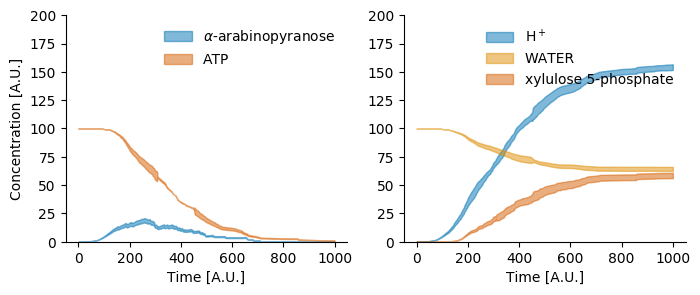

In [30]:
fig, ax = plt.subplots(1, 2, figsize = (4*2, 3*1), dpi = 100)

# ax[0].plot(data1.index, data1['obs_alpha_L_arabinopyranose_cyt'], label = '__NOLABEL__', color = palette[0])
# ax[0].plot(data1.index, data1['obs_ATP_cyt'], label = '__NOLABEL__', color = palette[3])
ax[0].fill_between(avrg.index, 
                   avrg['obs_alpha_L_arabinopyranose_cyt'] + stdv['obs_alpha_L_arabinopyranose_cyt'], 
                   avrg['obs_alpha_L_arabinopyranose_cyt'] - stdv['obs_alpha_L_arabinopyranose_cyt'],
                   label = r'$\alpha$-arabinopyranose', **{'color' : palette[0], 'alpha' : 0.5})
ax[0].fill_between(avrg.index, 
                   avrg['obs_ATP_cyt'] + stdv['obs_ATP_cyt'], 
                   avrg['obs_ATP_cyt'] - stdv['obs_ATP_cyt'],
                   label = r'ATP', **{'color' : palette[3], 'alpha' : 0.5})

# ax[1].plot(data1.index, data1['obs_PROTON_cyt'], label = '__NOLABEL__', color = palette[0])
# ax[1].plot(data1.index, data1['obs_XYLULOSE_5_PHOSPHATE_cyt'], label = '__NOLABEL__', color = palette[3])
ax[1].fill_between(avrg.index, 
                   avrg['obs_PROTON_cyt'] + stdv['obs_PROTON_cyt'], 
                   avrg['obs_PROTON_cyt'] - stdv['obs_PROTON_cyt'],
                   label = r'H$^+$', **{'color' : palette[0], 'alpha' : 0.5})
ax[1].fill_between(avrg.index, 
                   avrg['obs_WATER_cyt'] + stdv['obs_WATER_cyt'], 
                   avrg['obs_WATER_cyt'] - stdv['obs_WATER_cyt'],
                   label = 'WATER', **{'color' : palette[1], 'alpha' : 0.5})
ax[1].fill_between(avrg.index, 
                   avrg['obs_XYLULOSE_5_PHOSPHATE_cyt'] + stdv['obs_XYLULOSE_5_PHOSPHATE_cyt'], 
                   avrg['obs_XYLULOSE_5_PHOSPHATE_cyt'] - stdv['obs_XYLULOSE_5_PHOSPHATE_cyt'],
                   label = r'xylulose 5-phosphate', **{'color' : palette[3], 'alpha' : 0.5})

ax[0].set_xlabel('Time [A.U.]')
ax[0].set_ylabel('Concentration [A.U.]')
# ax[0].set_xlim(left = 0, right = 100)
ax[0].set_ylim(bottom = 0, top = 200)

ax[1].set_xlabel('Time [A.U.]')
# ax[1].set_xlim(left = 0, right = 100)
ax[1].set_ylim(bottom = 0, top = 200)

ax[0].legend(frameon = False)
ax[1].legend(frameon = False)

seaborn.despine()
plt.savefig('model_complete_fig0.png', format = 'png', bbox_inches = 'tight', dpi = 300)
plt.show()

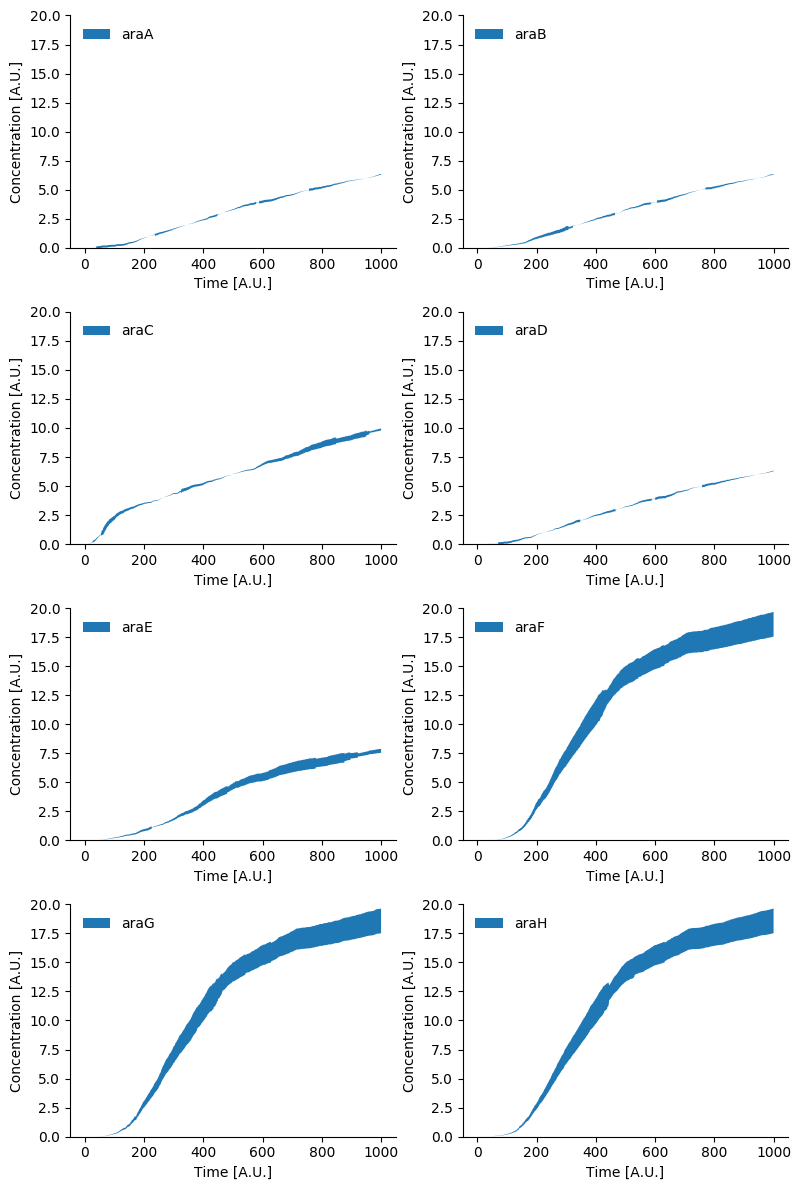

In [31]:
fig, ax = plt.subplots(4, 2, figsize = (4*2, 3*4), dpi = 100)
# ax[0,0].plot(data1.index, data1['obs_araA_prot'], label = '__NOLABEL__')
# ax[0,1].plot(data1.index, data1['obs_araB_prot'], label = '__NOLABEL__')
# ax[1,0].plot(data1.index, data1['obs_araC_prot'], label = '__NOLABEL__')
# ax[1,1].plot(data1.index, data1['obs_araD_prot'], label = '__NOLABEL__')
# ax[2,0].plot(data1.index, data1['obs_araE_prot'], label = '__NOLABEL__')
# ax[2,1].plot(data1.index, data1['obs_araF_prot'], label = '__NOLABEL__')
# ax[3,0].plot(data1.index, data1['obs_araG_prot'], label = '__NOLABEL__')
# ax[3,1].plot(data1.index, data1['obs_araH_prot'], label = '__NOLABEL__')

ax[0,0].fill_between(avrg.index, 
                     avrg['obs_araA_prot'] + stdv['obs_araA_prot'], 
                     avrg['obs_araA_prot'] - stdv['obs_araA_prot'], label = 'araA')

ax[0,1].fill_between(avrg.index, 
                     avrg['obs_araB_prot'] + stdv['obs_araB_prot'], 
                     avrg['obs_araB_prot'] - stdv['obs_araB_prot'], label = 'araB')

ax[1,0].fill_between(avrg.index, 
                     avrg['obs_araC_prot'] + stdv['obs_araC_prot'], 
                     avrg['obs_araC_prot'] - stdv['obs_araC_prot'], label = 'araC')

ax[1,1].fill_between(avrg.index, 
                     avrg['obs_araD_prot'] + stdv['obs_araD_prot'], 
                     avrg['obs_araD_prot'] - stdv['obs_araD_prot'], label = 'araD')

ax[2,0].fill_between(avrg.index, 
                     avrg['obs_araE_prot'] + stdv['obs_araE_prot'], 
                     avrg['obs_araE_prot'] - stdv['obs_araE_prot'], label = 'araE')

ax[2,1].fill_between(avrg.index, 
                     avrg['obs_araF_prot'] + stdv['obs_araF_prot'], 
                     avrg['obs_araF_prot'] - stdv['obs_araF_prot'], label = 'araF')

ax[3,0].fill_between(avrg.index, 
                     avrg['obs_araG_prot'] + stdv['obs_araG_prot'], 
                     avrg['obs_araG_prot'] - stdv['obs_araG_prot'], label = 'araG')

ax[3,1].fill_between(avrg.index, 
                     avrg['obs_araH_prot'] + stdv['obs_araH_prot'], 
                     avrg['obs_araH_prot'] - stdv['obs_araH_prot'], label = 'araH')

for ax in ax.ravel():
    ax.set_xlabel('Time [A.U.]')
    ax.set_ylabel('Concentration [A.U.]')
    ax.set_ylim(bottom = 0, top = 20)
    ax.legend(frameon = False, loc = 'upper left')

seaborn.despine()
plt.tight_layout()
plt.savefig('model_complete_fig1.png', format = 'png', bbox_inches = 'tight', dpi = 300)
plt.show()